# **Projeto ADA Técnicas de Programação I**

**Descrição**


No projeto prático do módulo: Técnicas de programação I, aplicaremos as técnicas aprendidas em aula para criarmos uma análise exploratória sobre um conjunto de dados.

**Objetivo**

Apresentar uma análise exploratória de dados utilizando bases de dados relacionadas ao Brasil. Estruturamos a análise criando um *storytelling*: Uma história contada com informações, gráficos e imagens (opcional) e medidas estatísticas, associando dados a fatos em uma linha do tempo.

**Dados**

A fonte de dados escolhida para o projeto foi Covid19br, disponível em https://github.com/wcota/covid19br/


**Entregáveis**

O projeto completo (notebook, código-fonte, link para fontes, bases e demais artefatos) foram publicados conforme instruções do LMS.


Grupo:
Juliana de Lima
Rafael Assis
Paulo Paixão
Vanderlandio da Rocha
Helouise Dayane
Patricia Adania



In [ ]:
!pip install sweetviz

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns
import sweetviz as sv




In [ ]:
df_total = pd.read_csv('/content/cases-brazil-total.csv')

                                             |          | [  0%]   00:00 -> (? left)


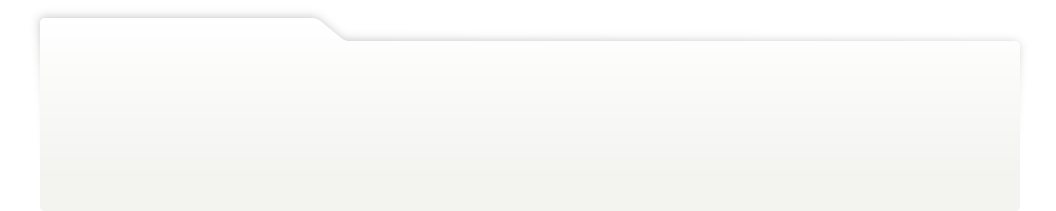
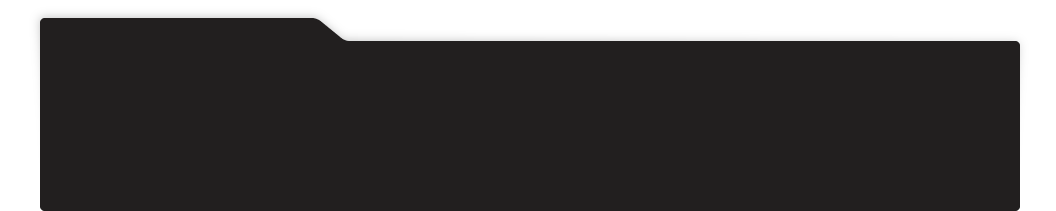
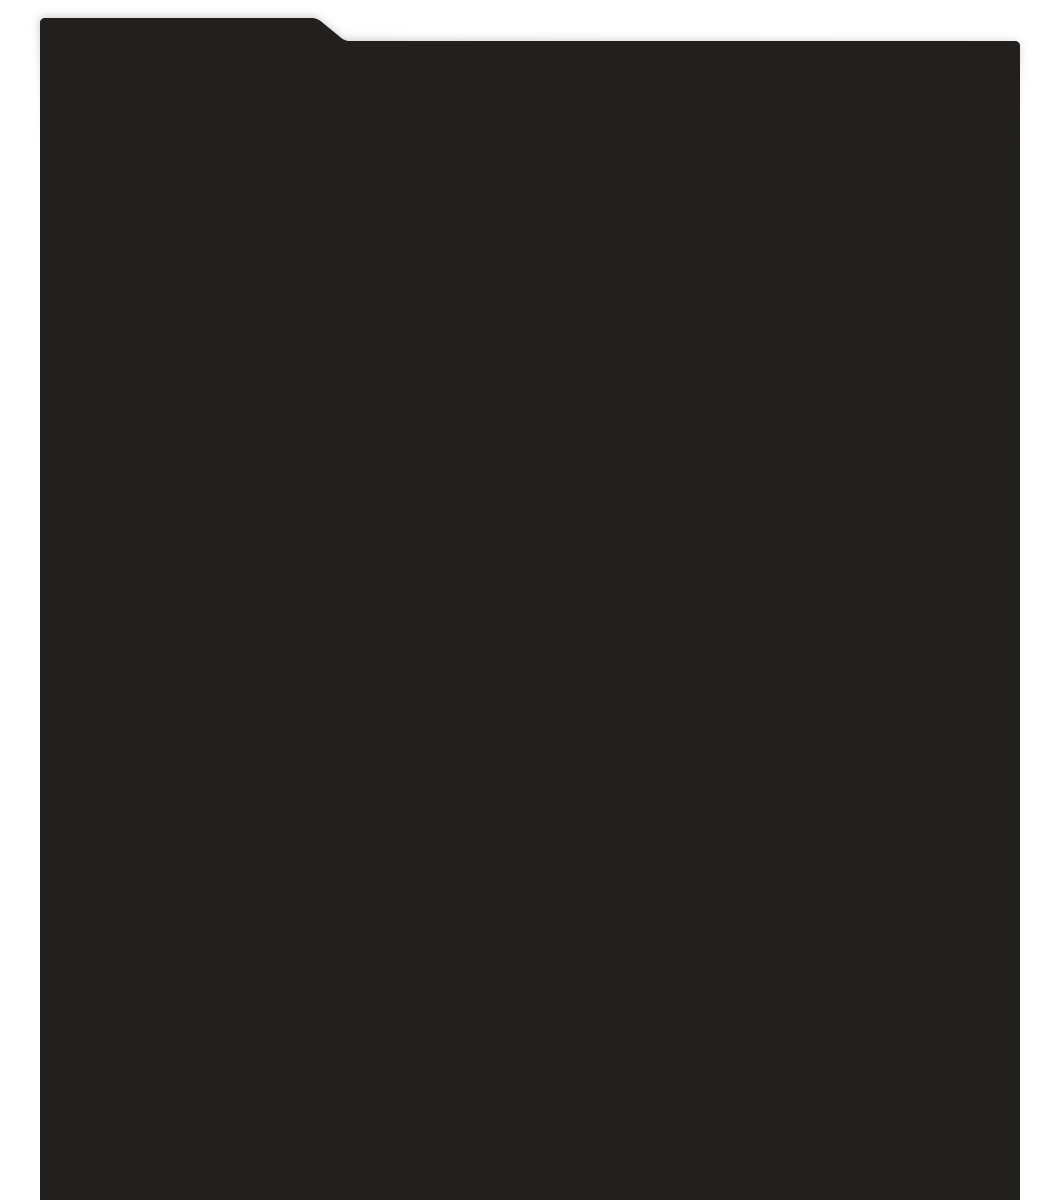
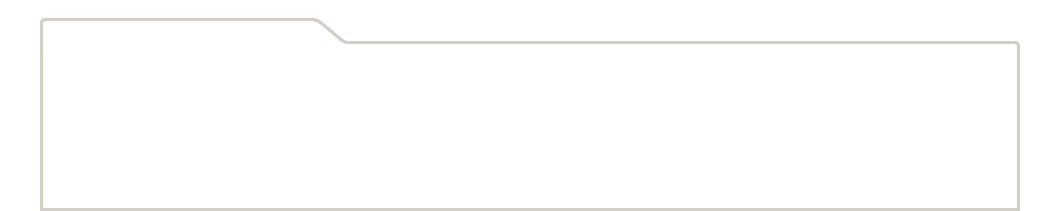
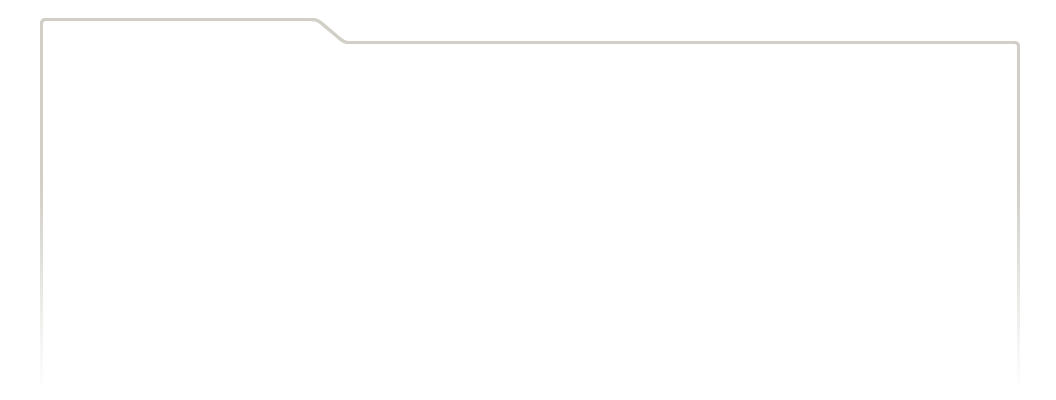
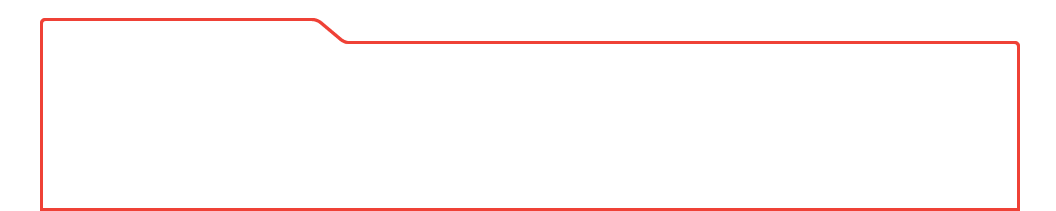
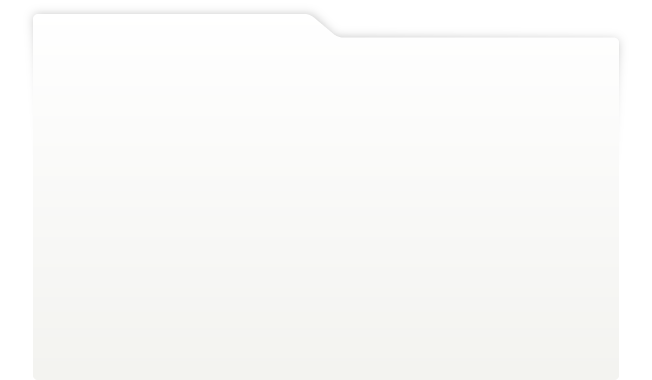
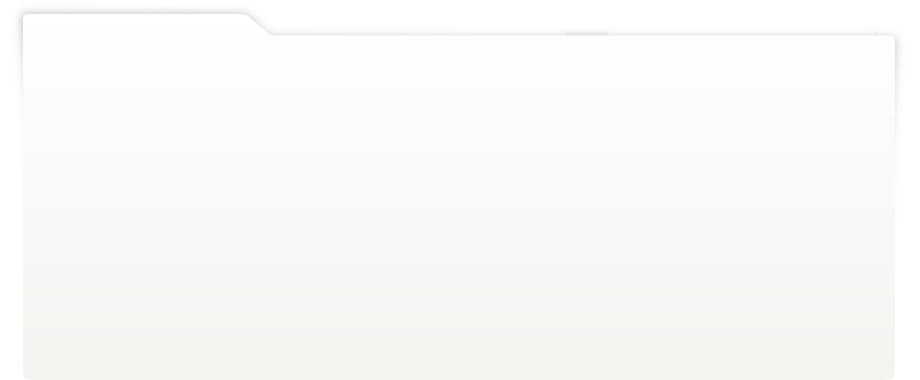
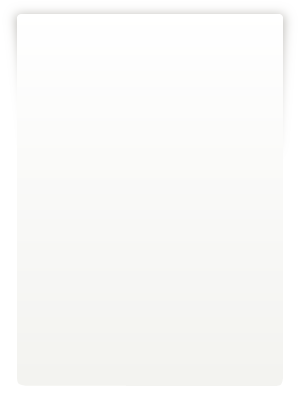
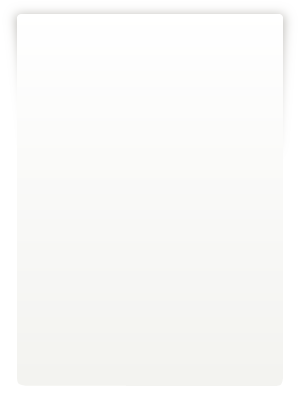
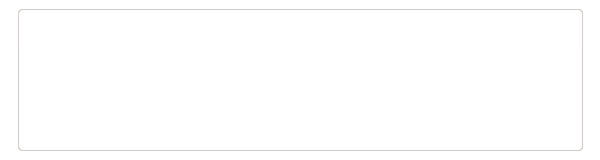
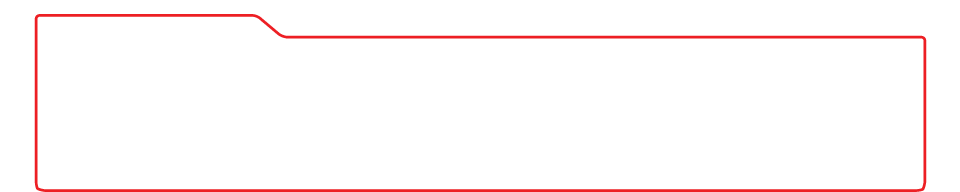
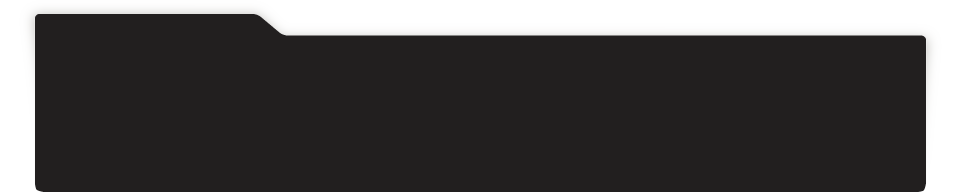
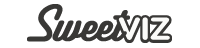
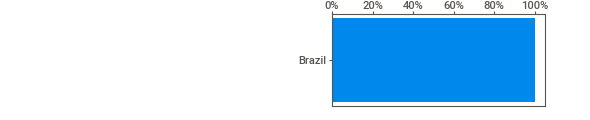
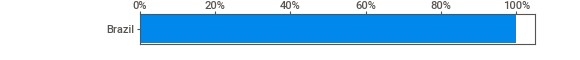
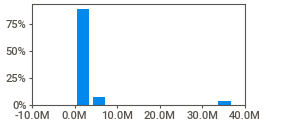
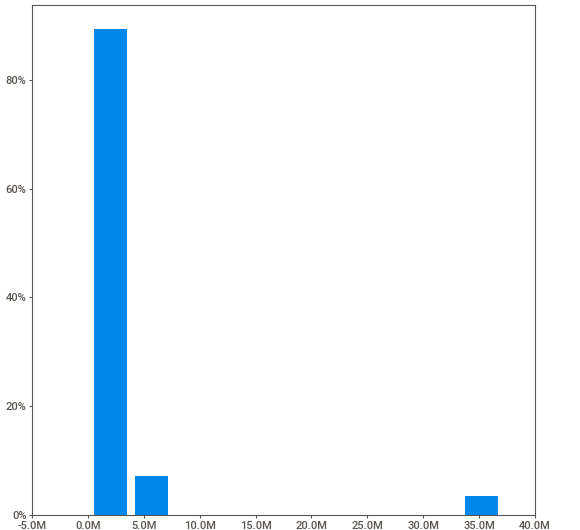
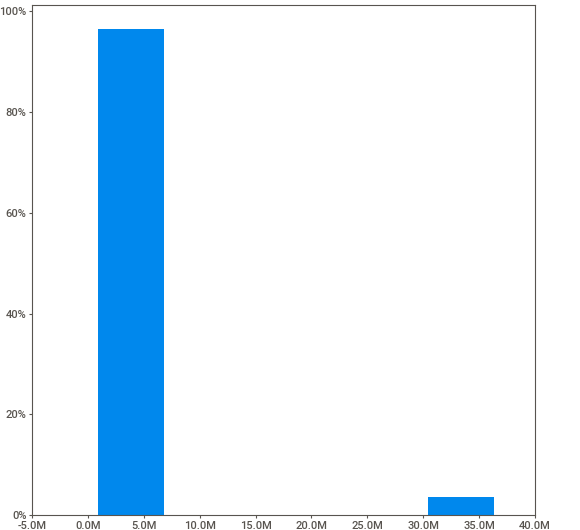
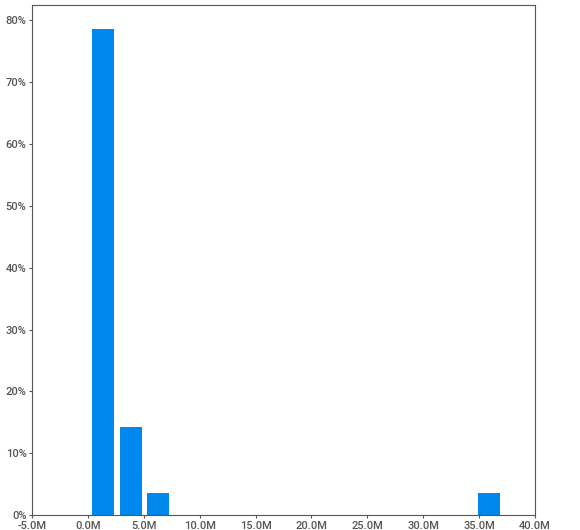
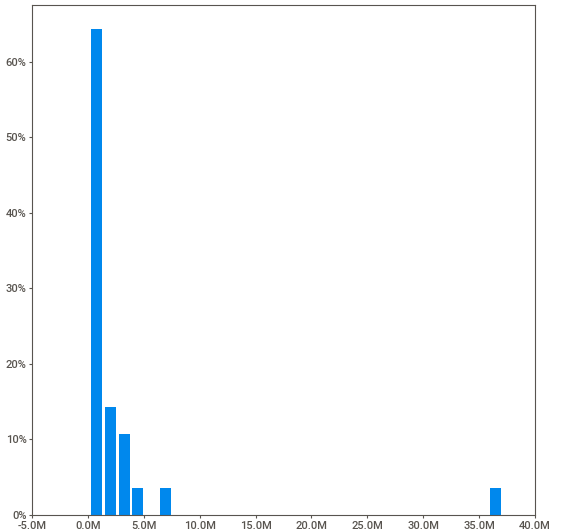
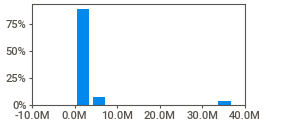
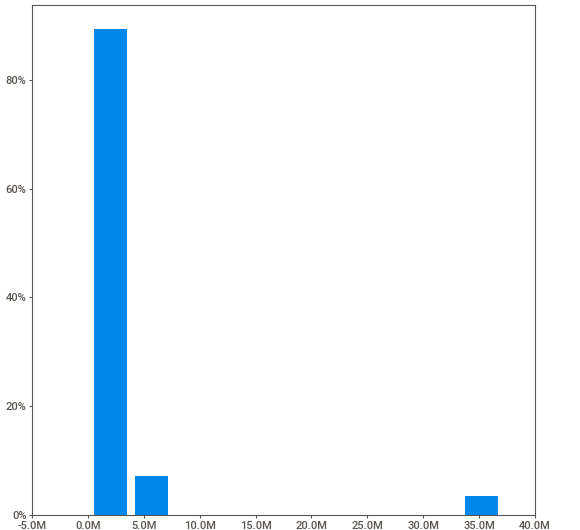
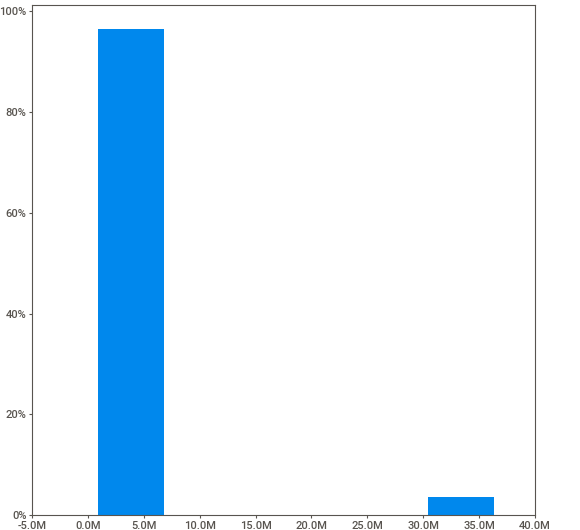
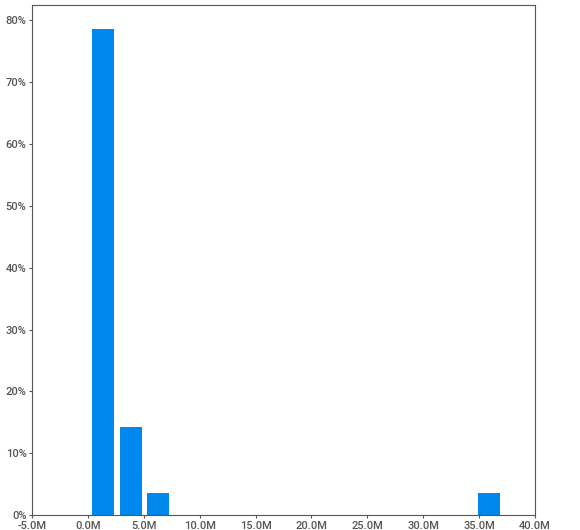
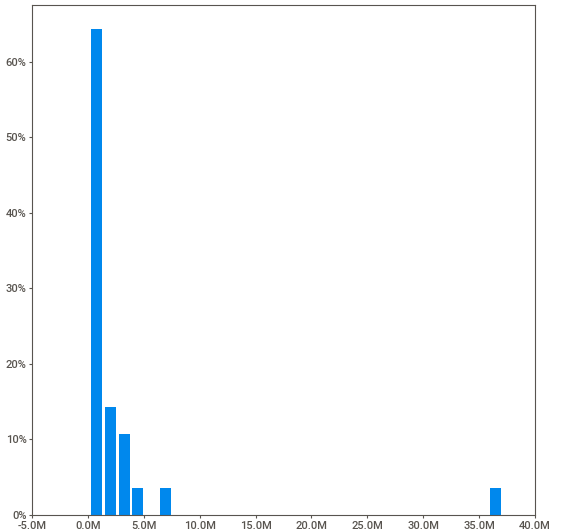
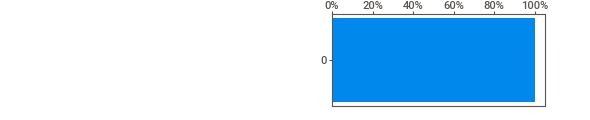
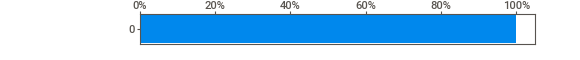
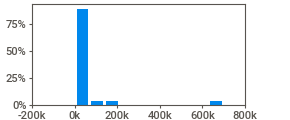
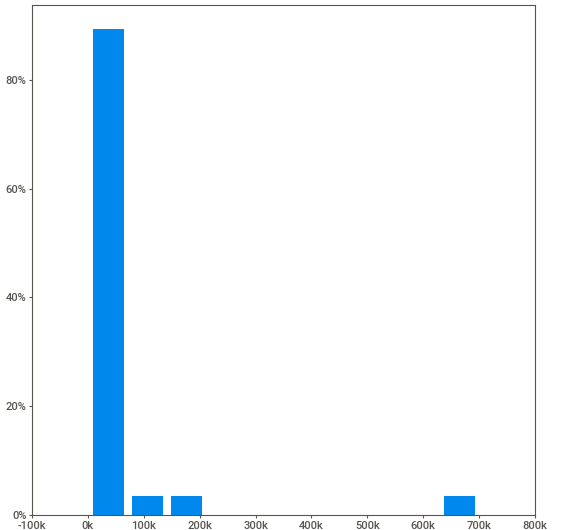
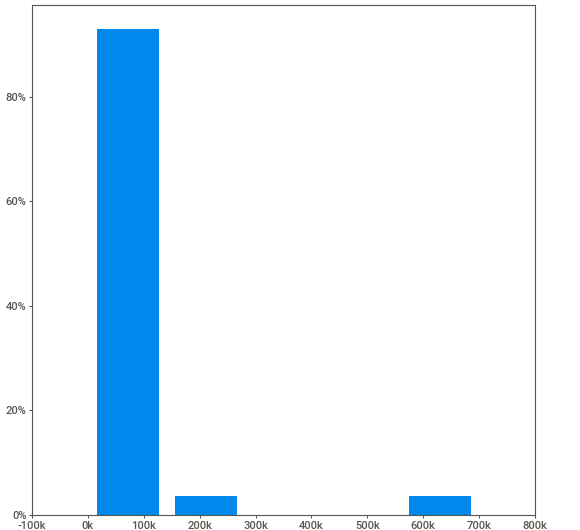
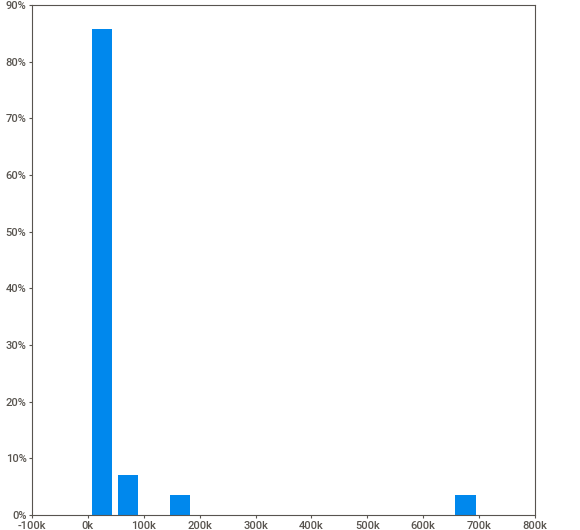
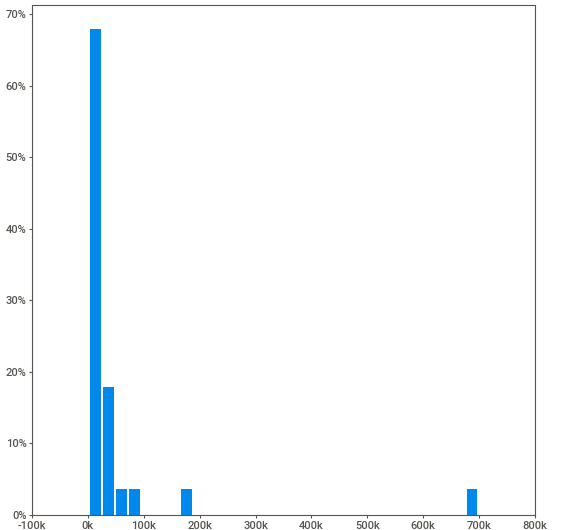
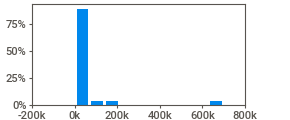
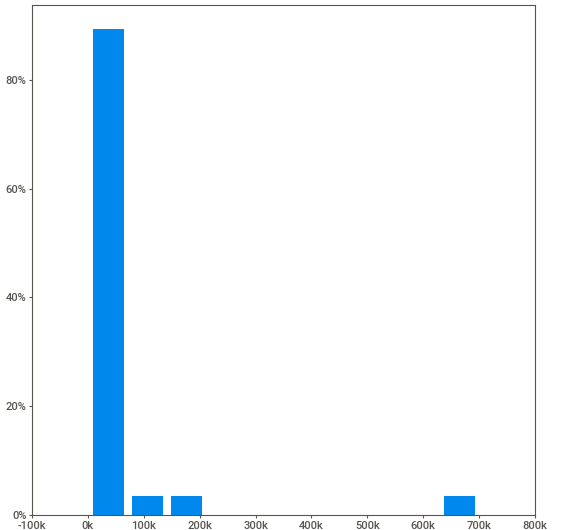
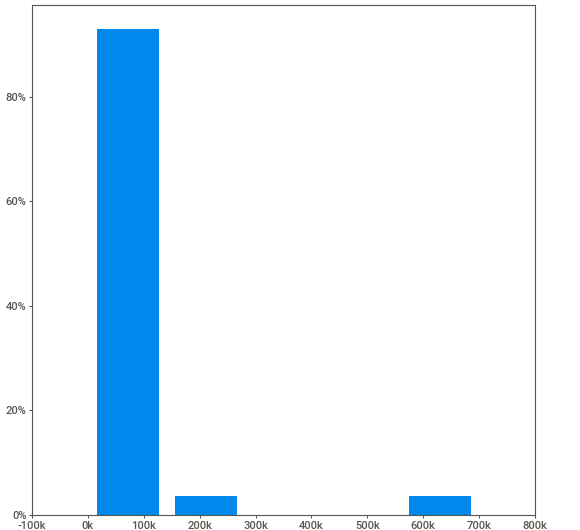
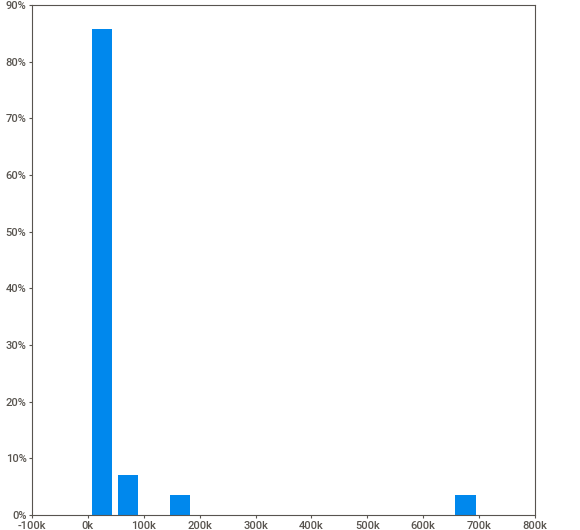
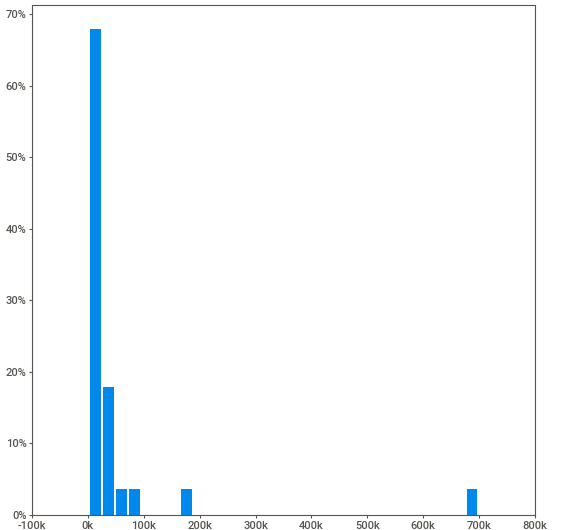
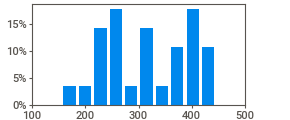
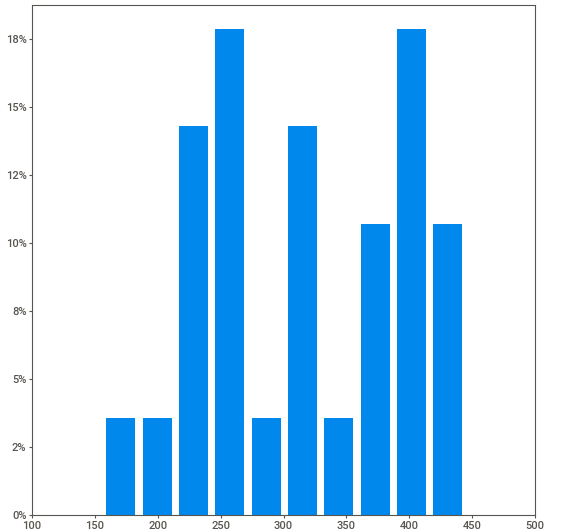
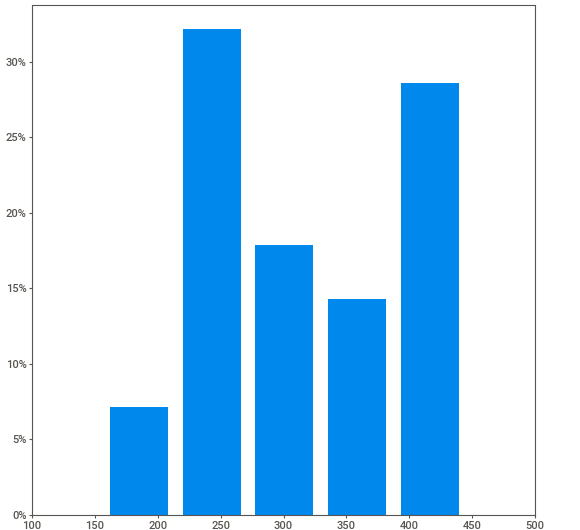
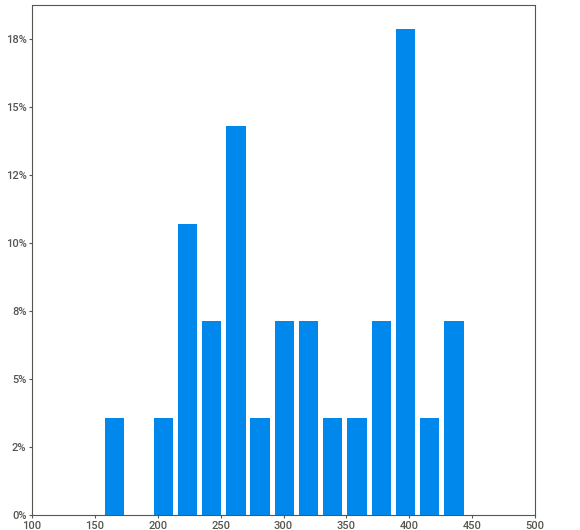
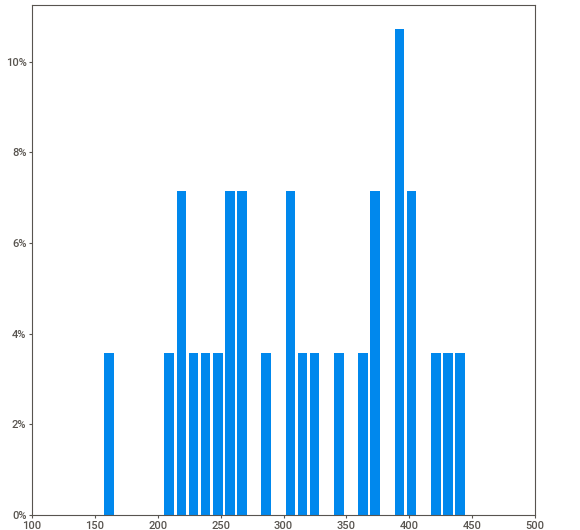
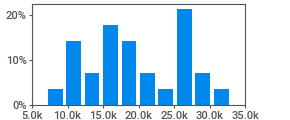
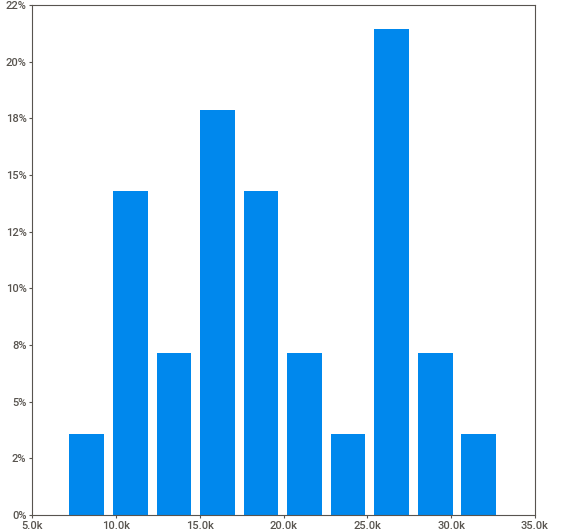
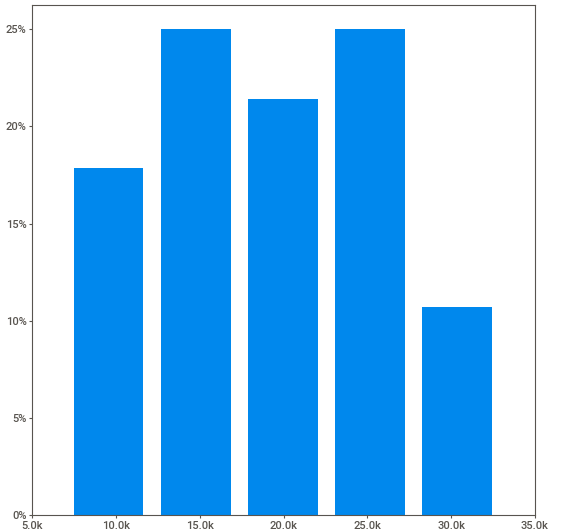
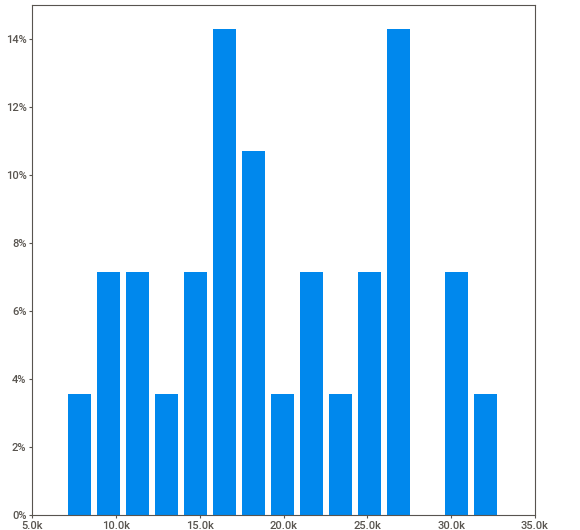
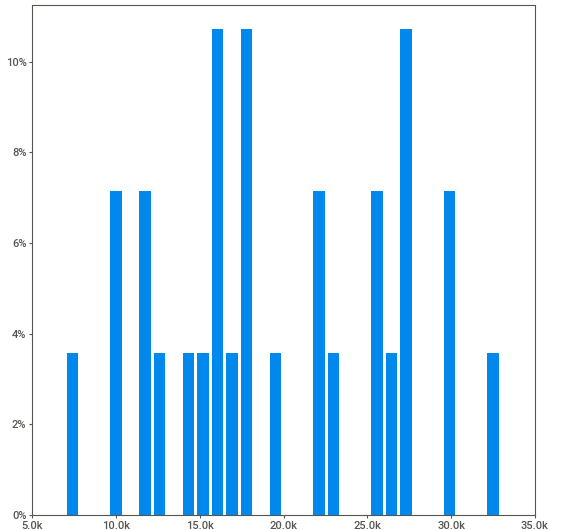
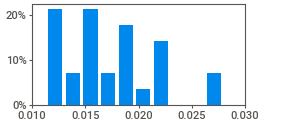
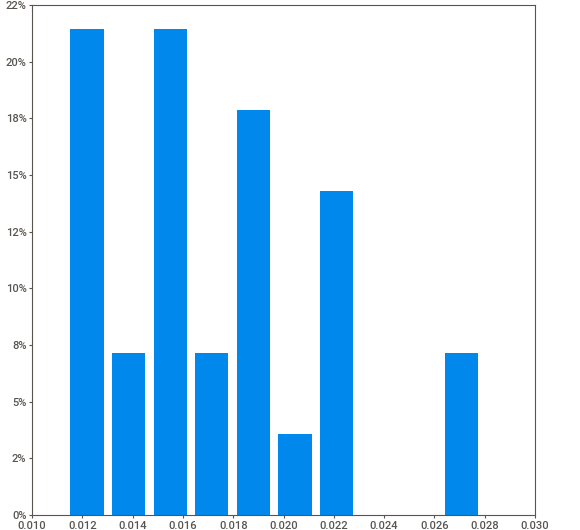
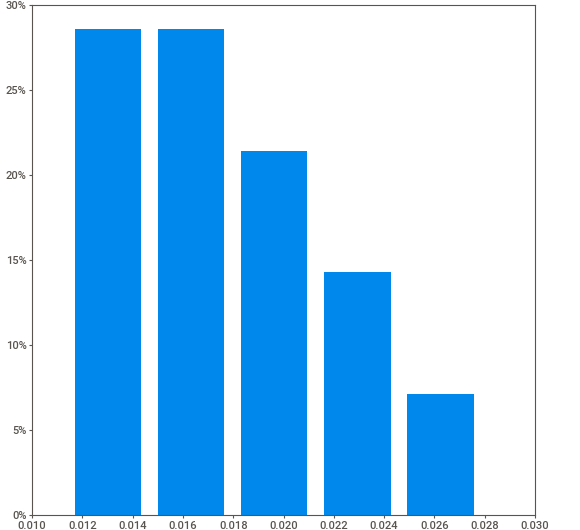
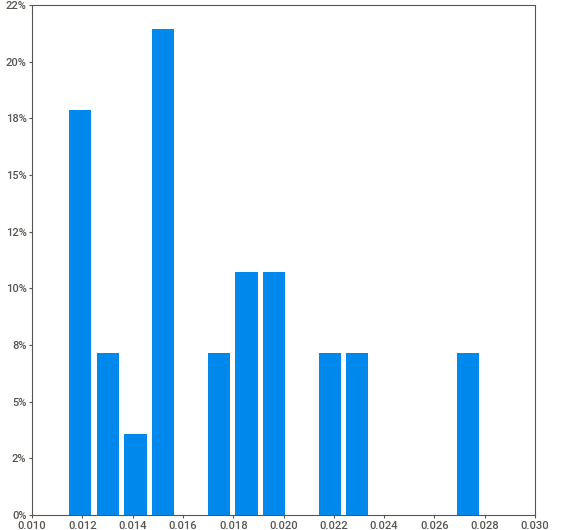
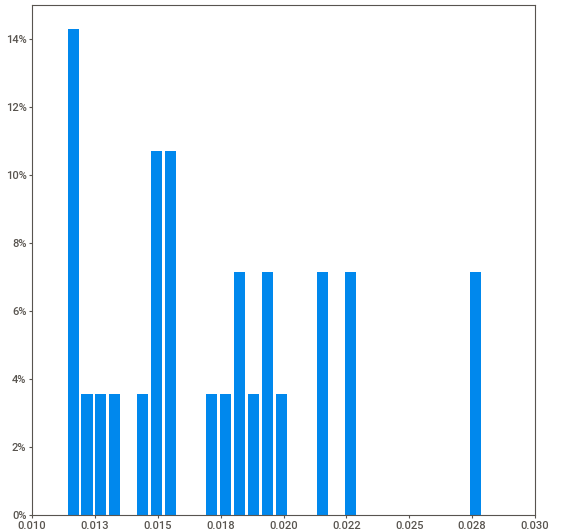
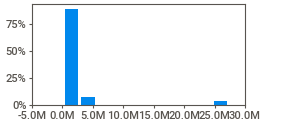
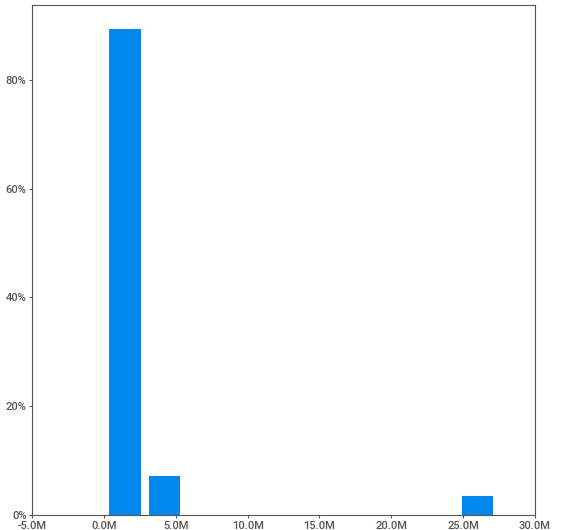
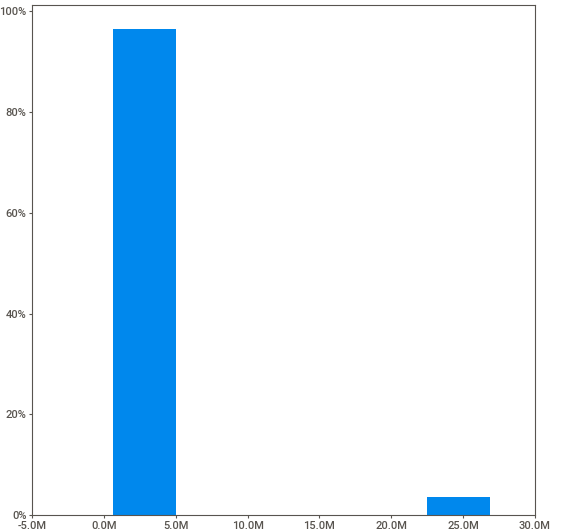
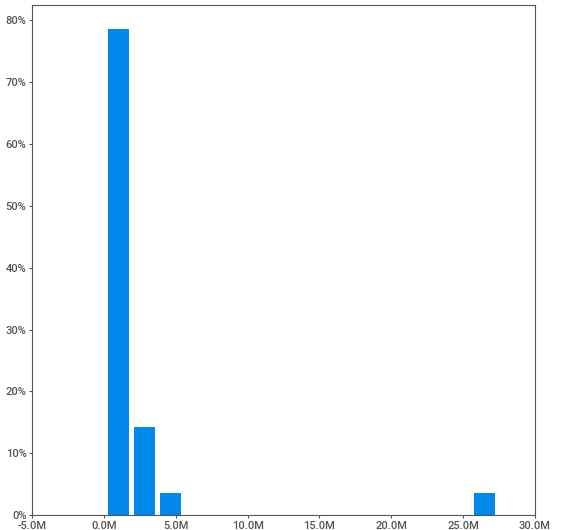
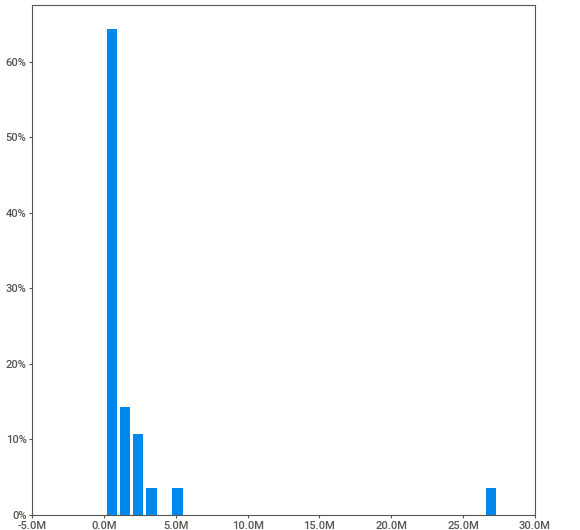
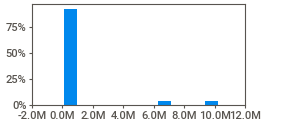
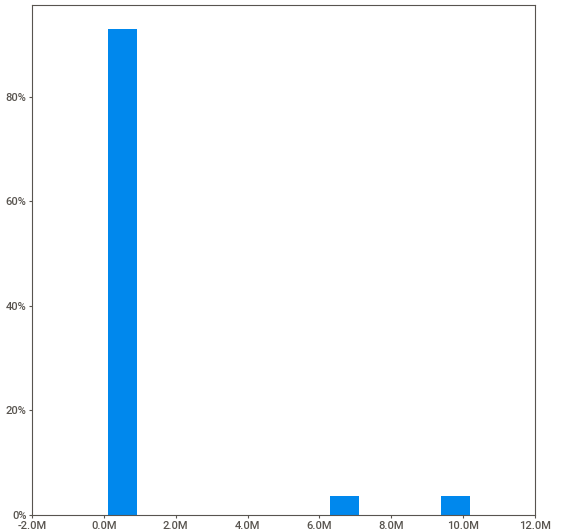
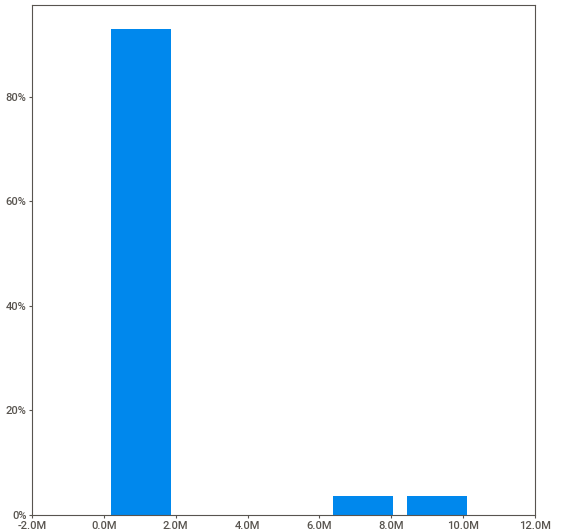
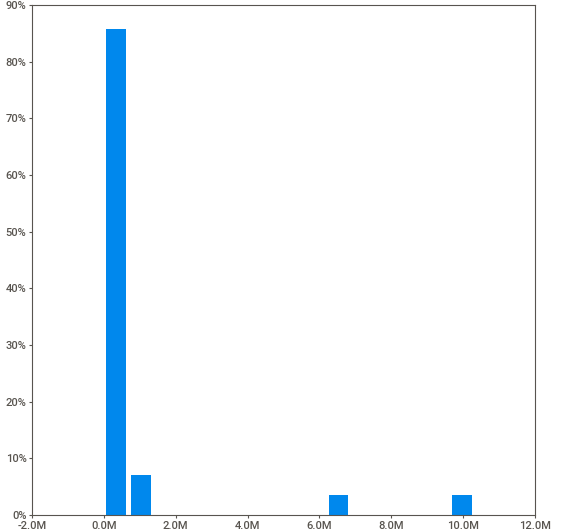
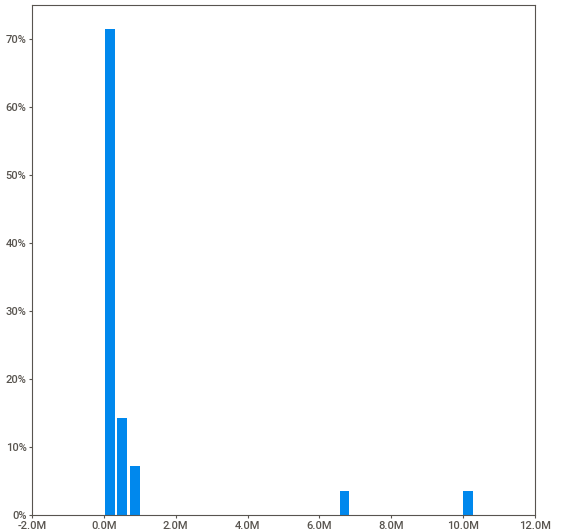
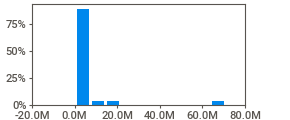
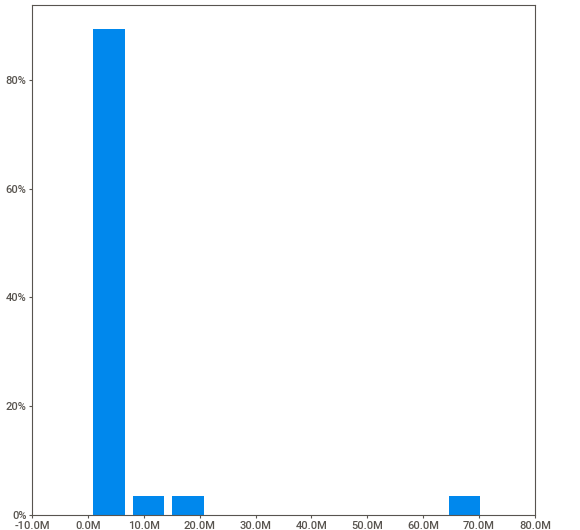
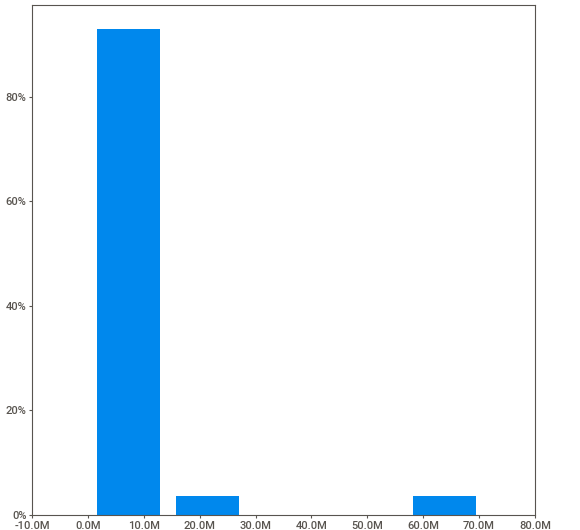
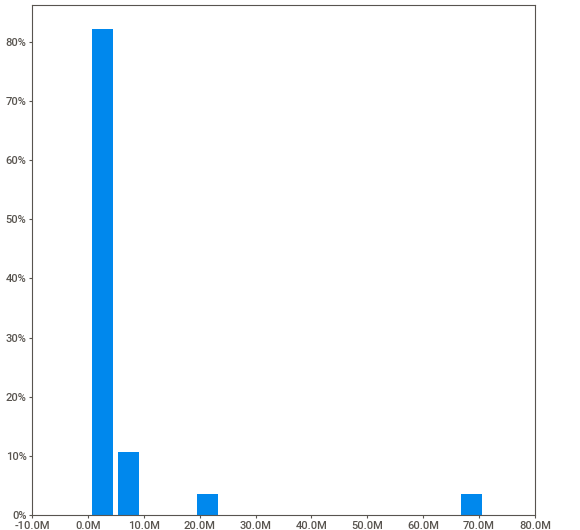
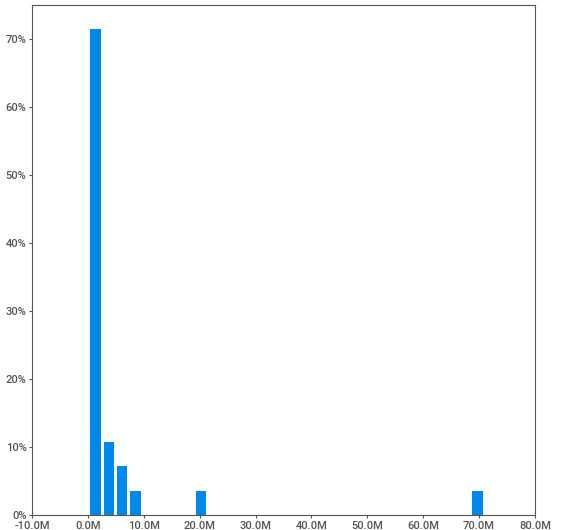
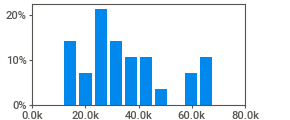
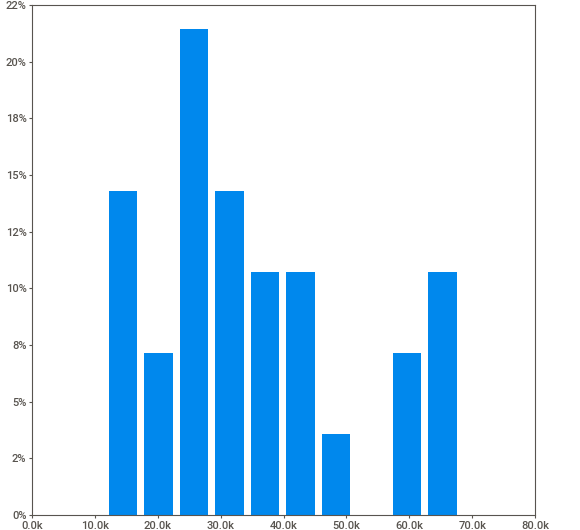
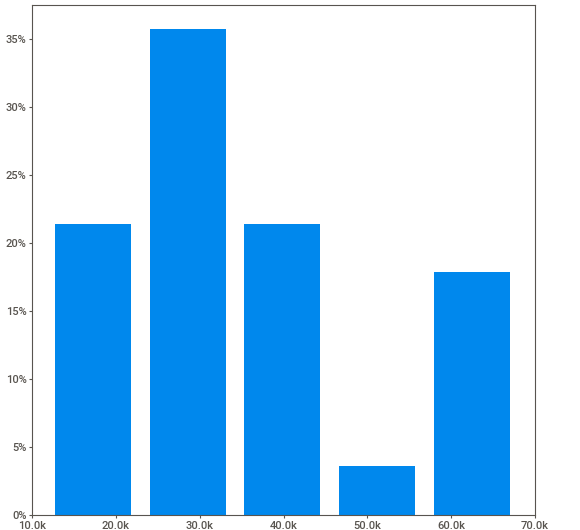
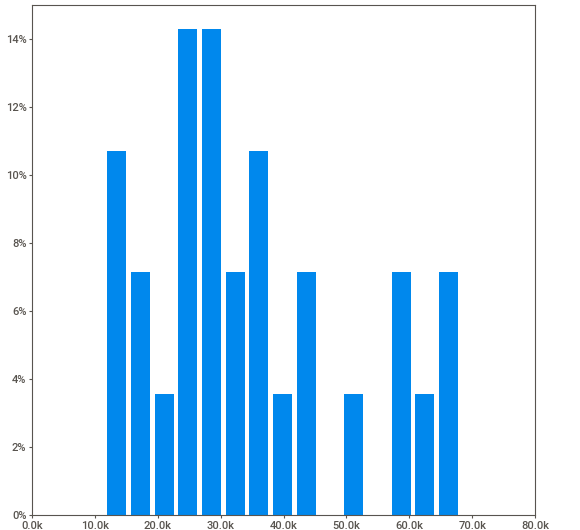
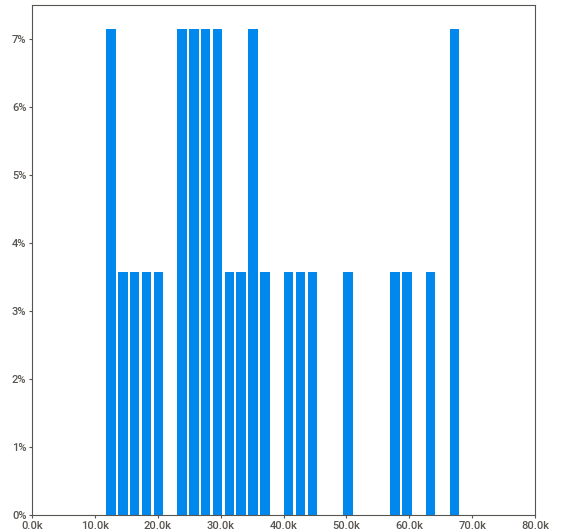
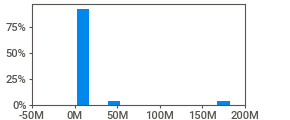
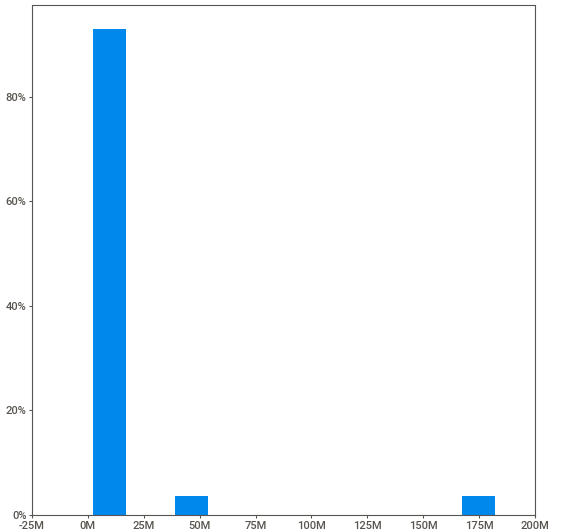
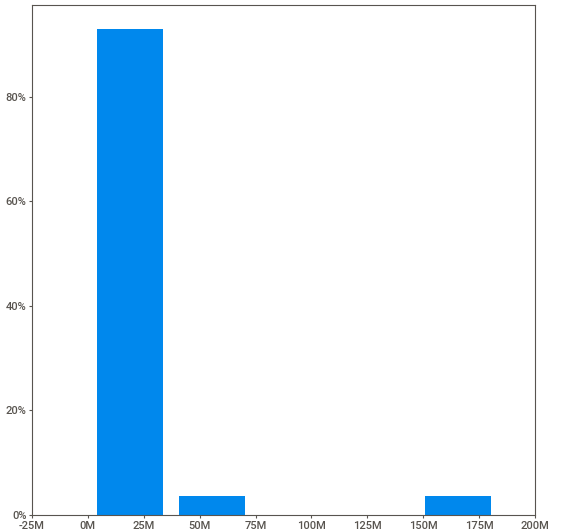
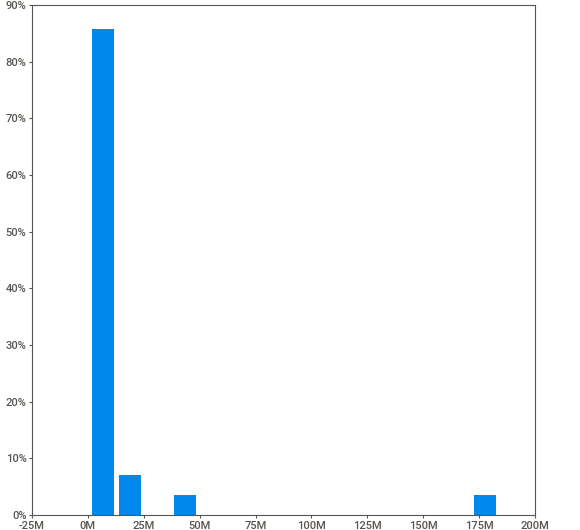
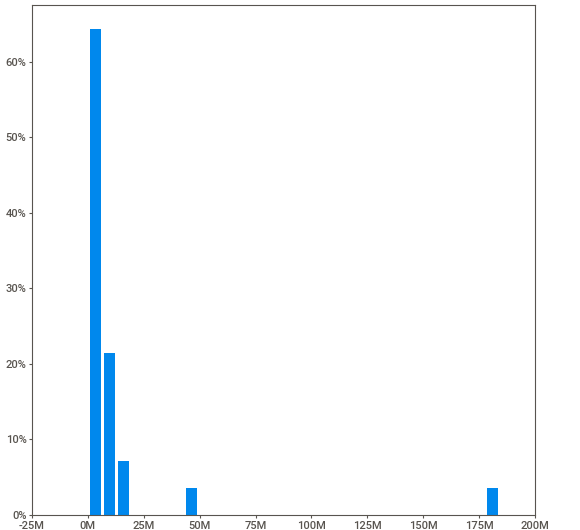
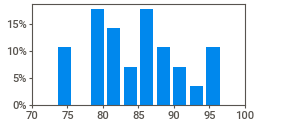
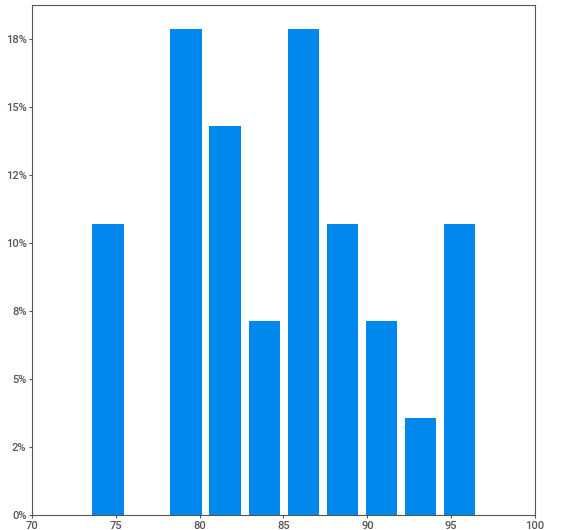
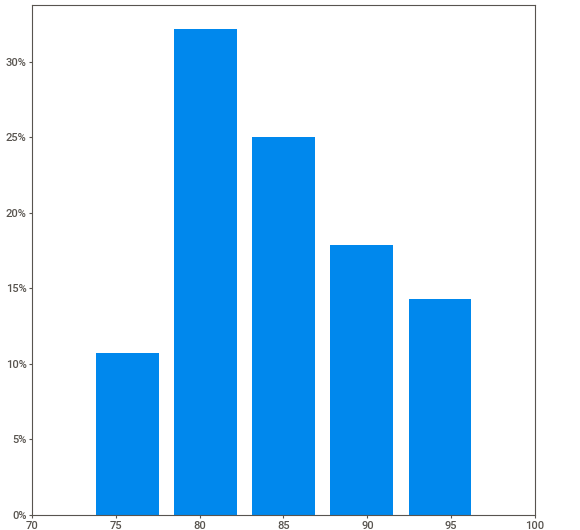
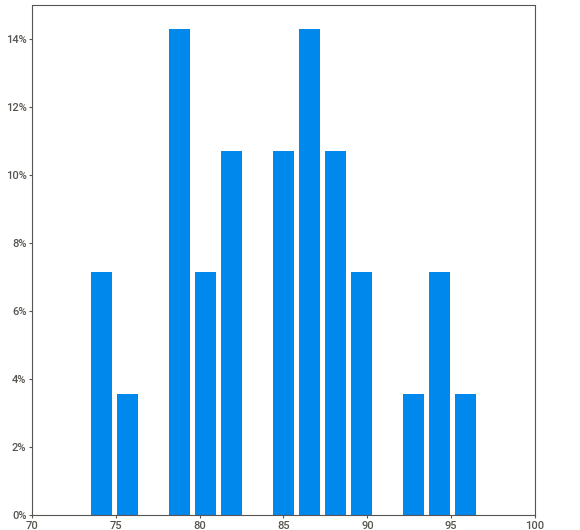
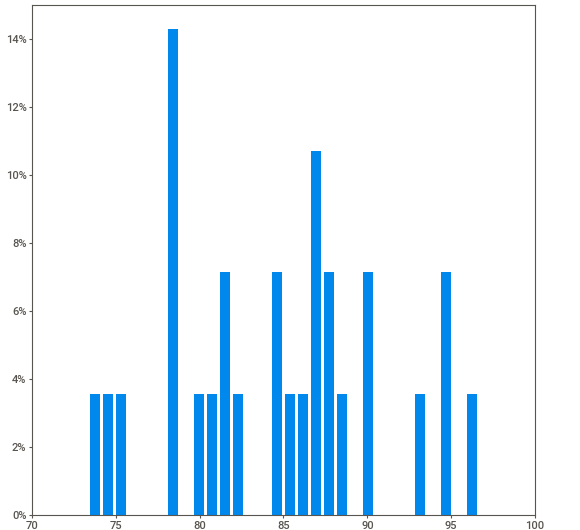
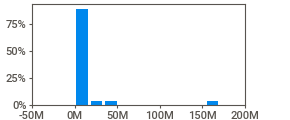
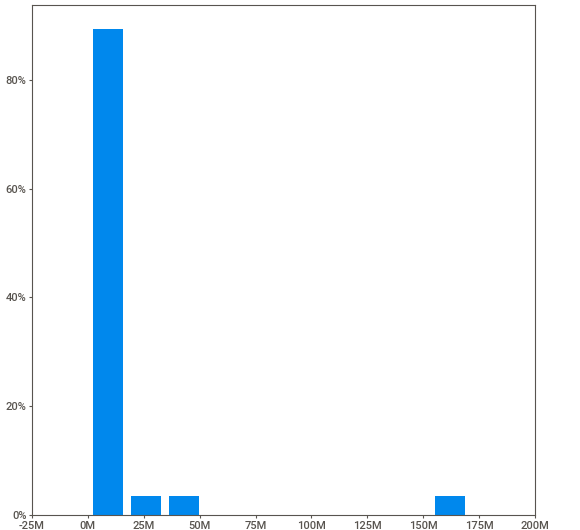
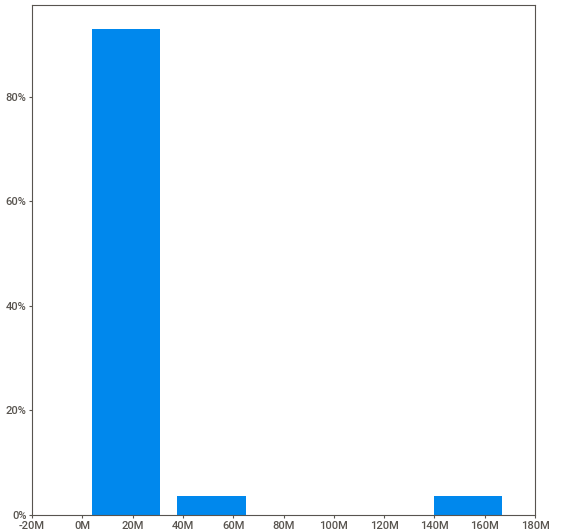
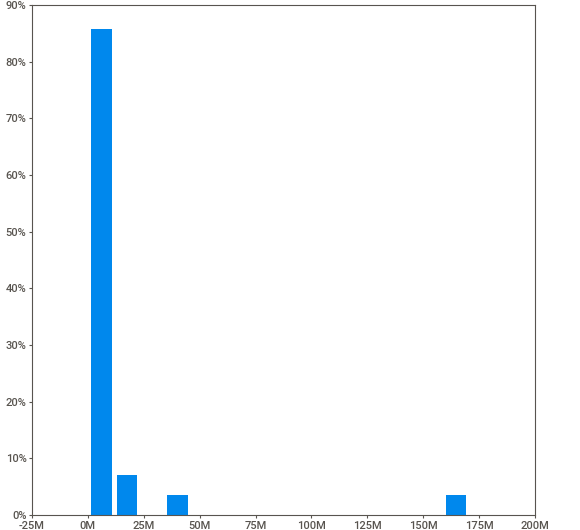
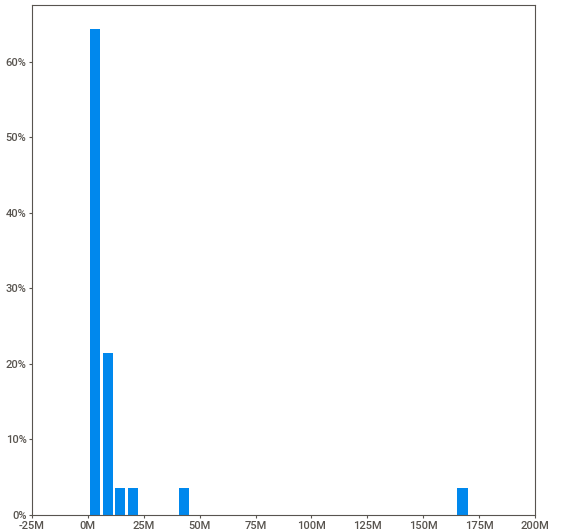
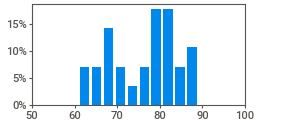
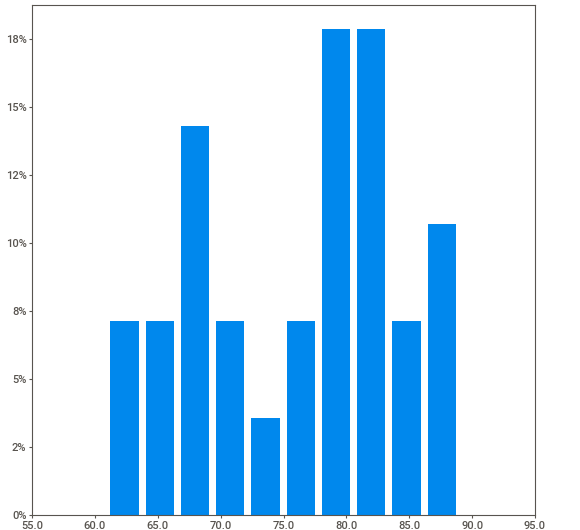
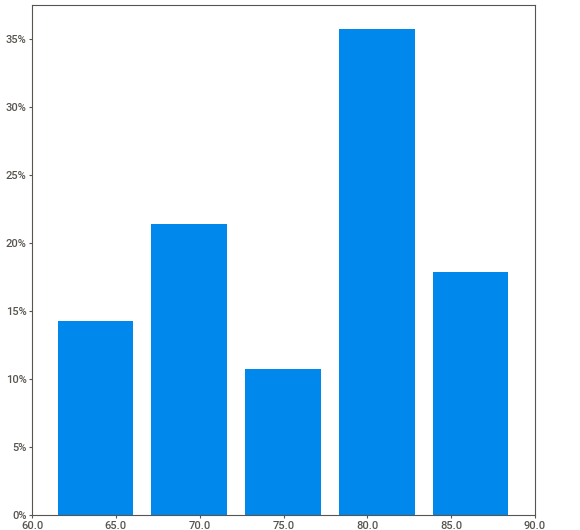
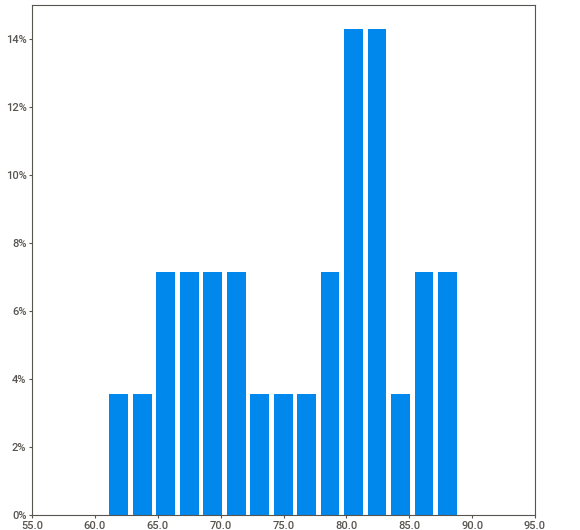
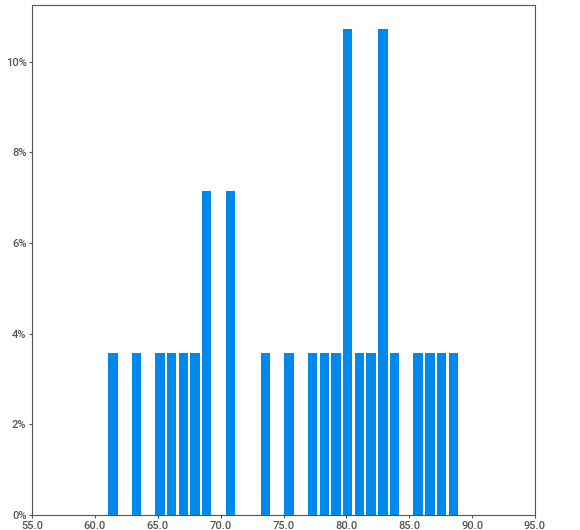
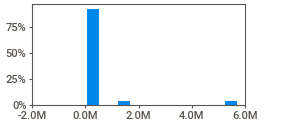
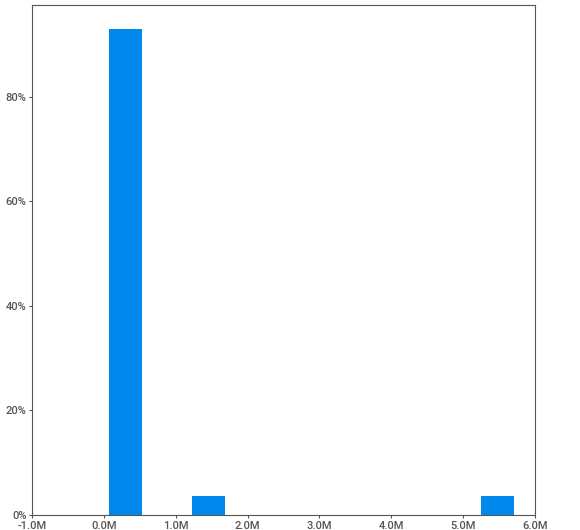
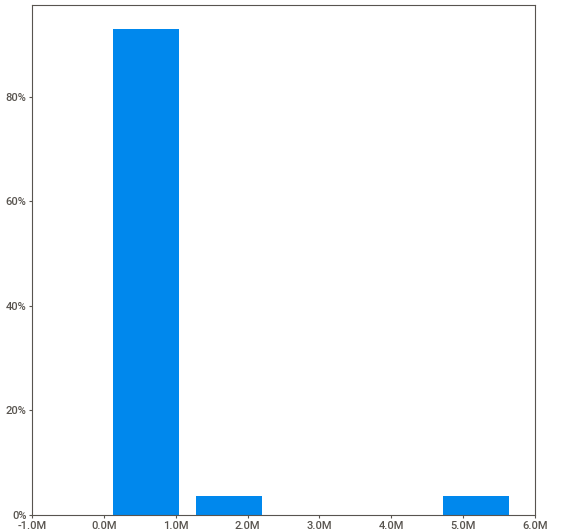
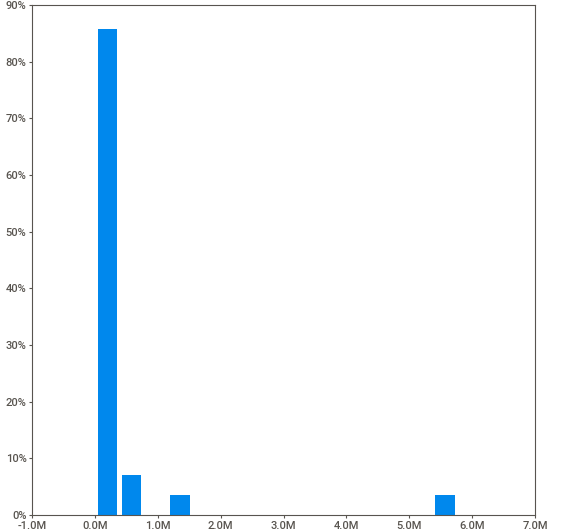
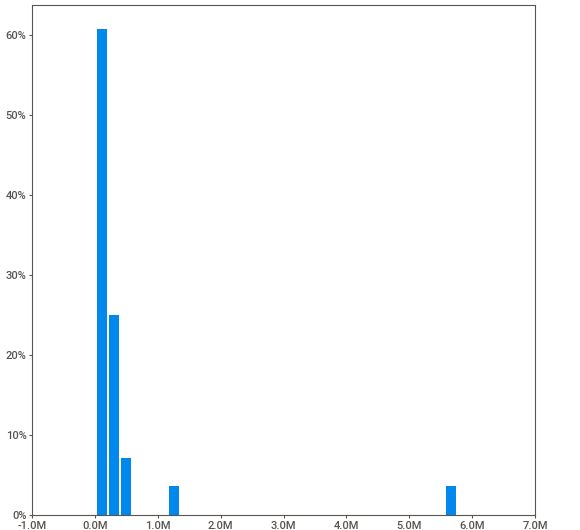
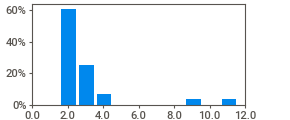
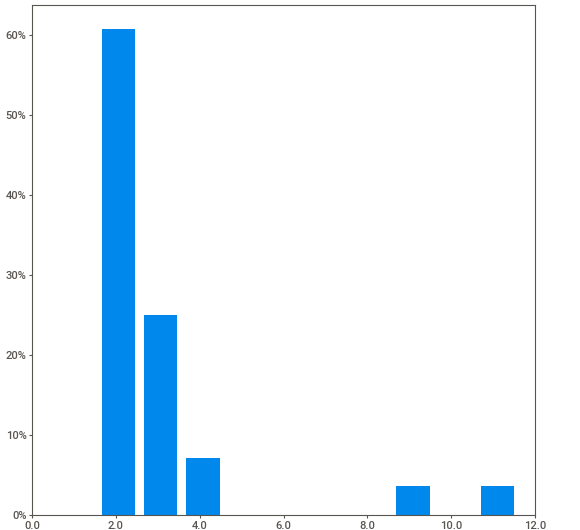
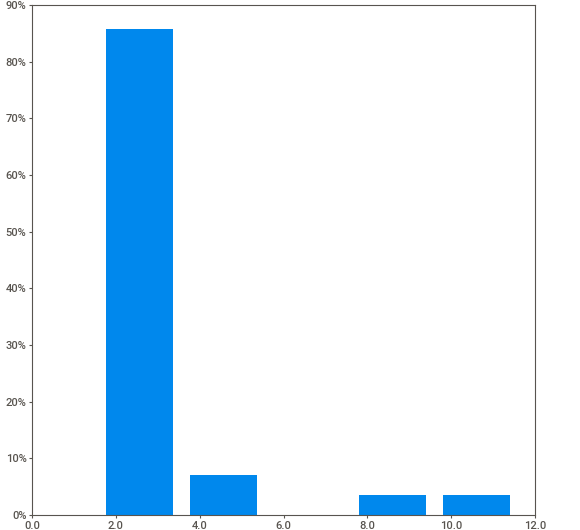
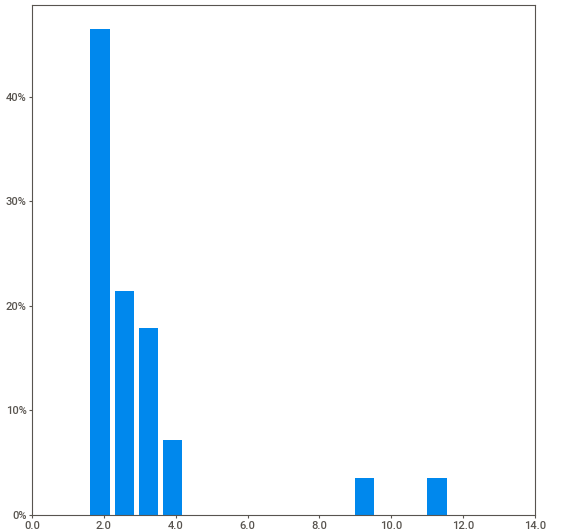
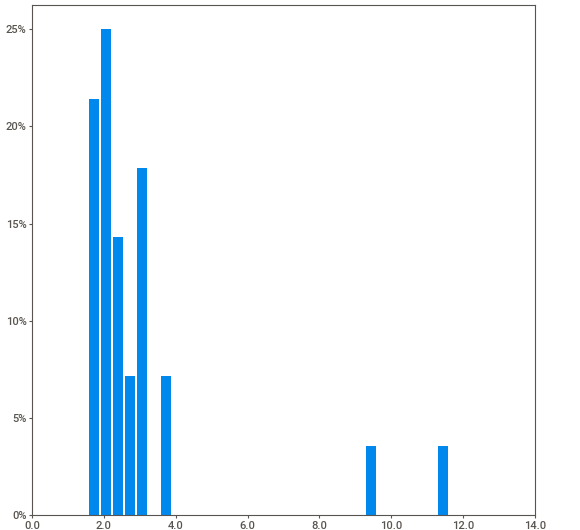
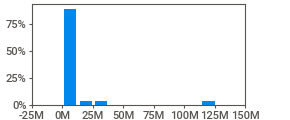
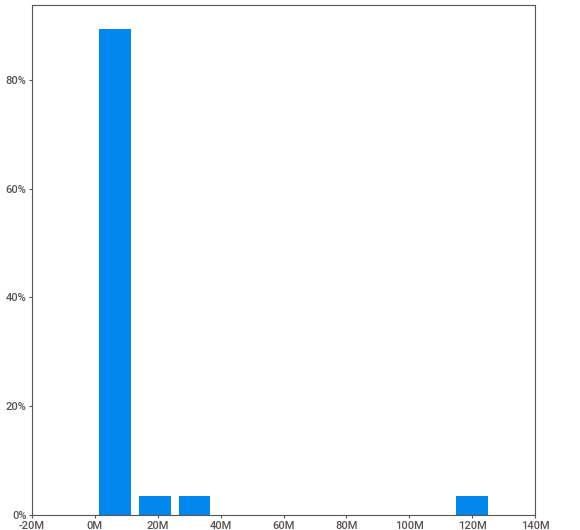
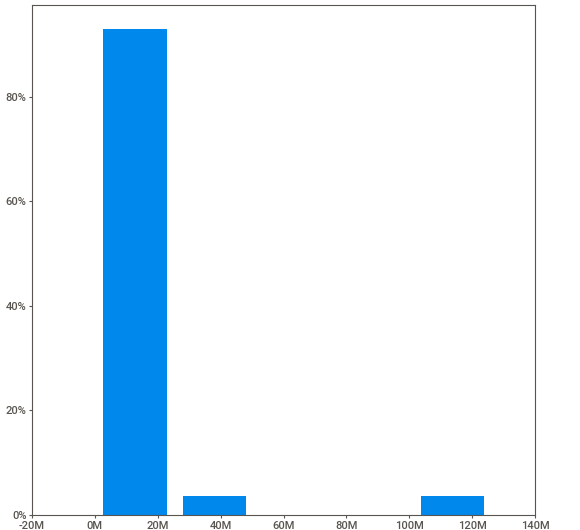
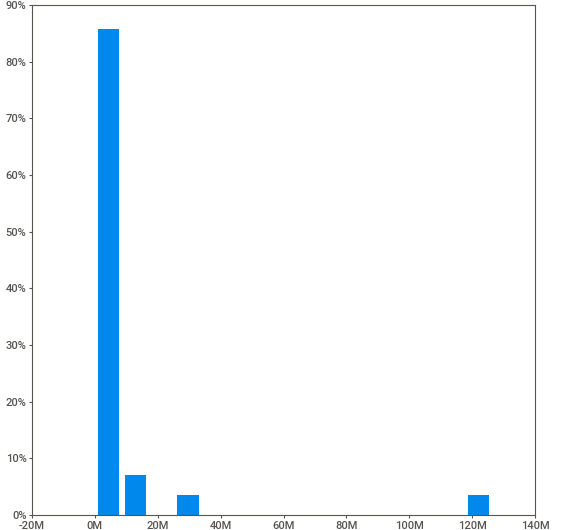
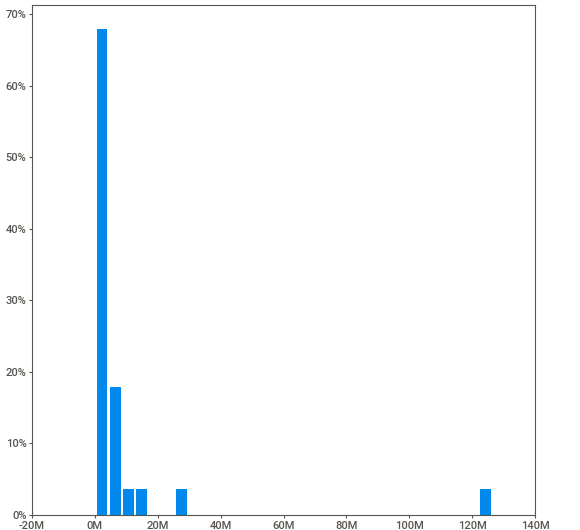
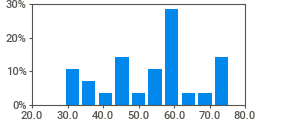
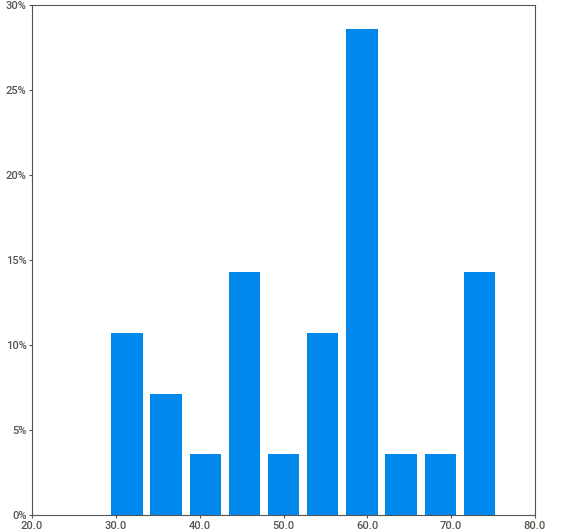
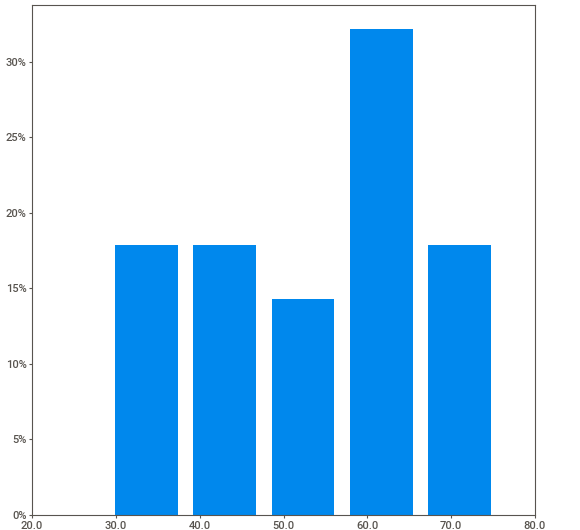
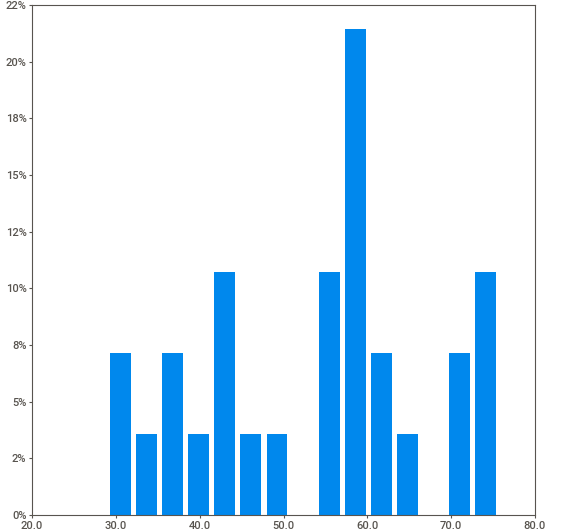
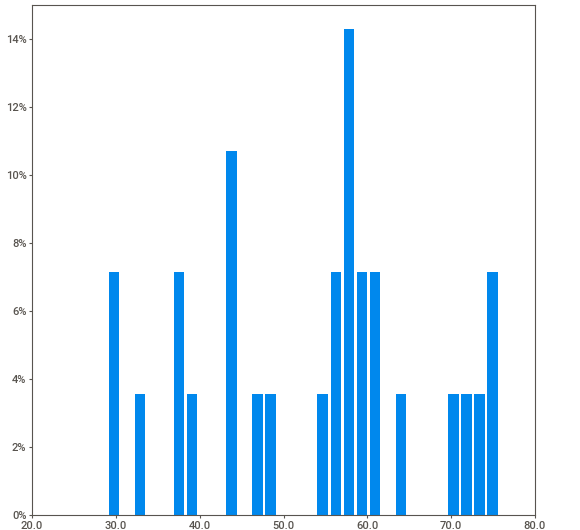
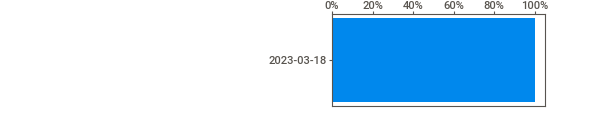
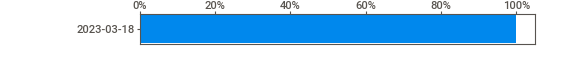
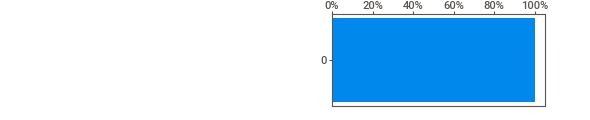
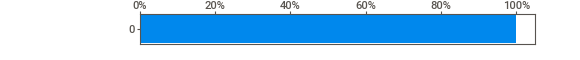
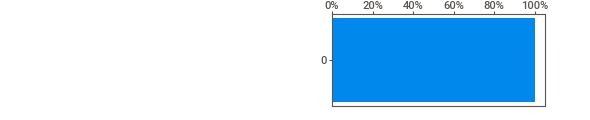
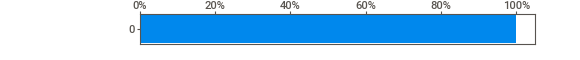
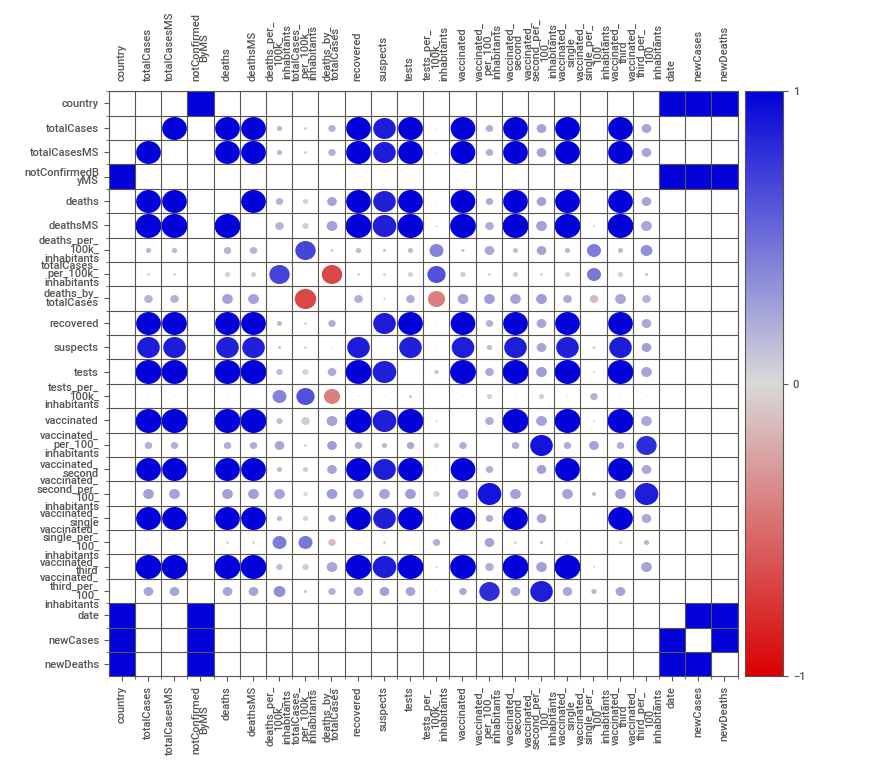
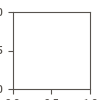

In [ ]:
my_report = sv.analyze(df_total)
my_report.show_notebook(  w="100%",
                h="full",
                scale=None,
                layout='widescreen',
                filepath=None)

In [ ]:
df_total.head()

,country,state,totalCases,totalCasesMS,notConfirmedByMS,deaths,deathsMS,URL,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,...,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants,date,newCases,newDeaths
0,Brazil,TOTAL,37085520,37085520,0,699310,699310,https://covid.saude.gov.br/,327.82568,17385.11647,...,86.19512,170385963,79.87430,5759211,2.69983,126348017,59.22999,2023-03-18,0,0
1,Brazil,AC,160452,160452,0,2043,2043,http://saude.acre.gov.br/,231.64972,18193.17750,...,78.75388,607656,68.90032,13768,1.56111,388810,44.08602,2023-03-18,0,0
2,Brazil,AL,337568,337568,0,7242,7242,http://cidadao.saude.al.gov.br/,216.99806,10114.83039,...,78.42982,2271143,68.05214,58151,1.74243,1453763,43.56031,2023-03-18,0,0
3,Brazil,AM,631976,631976,0,14443,14443,http://www.amazonas.am.gov.br/,348.47779,15248.18939,...,80.46358,2856226,68.91444,84223,2.03212,1954567,47.15940,2023-03-18,0,0
4,Brazil,AP,185673,185673,0,2167,2167,https://saude.portal.ap.gov.br/,256.22804,21954.14381,...,73.37108,531674,62.86562,17200,2.03374,320247,37.86630,2023-03-18,0,0


In [ ]:
df_total.isna().sum()

country                                  0
state                                    0
totalCases                               0
totalCasesMS                             0
notConfirmedByMS                         0
deaths                                   0
deathsMS                                 0
URL                                      0
deaths_per_100k_inhabitants              0
totalCases_per_100k_inhabitants          0
deaths_by_totalCases                     0
recovered                                0
suspects                                 0
tests                                    0
tests_per_100k_inhabitants               0
vaccinated                               0
vaccinated_per_100_inhabitants           0
vaccinated_second                        0
vaccinated_second_per_100_inhabitants    0
vaccinated_single                        0
vaccinated_single_per_100_inhabitants    0
vaccinated_third                         0
vaccinated_third_per_100_inhabitants     0
date       

In [ ]:
df_total.dtypes

country                                   object
state                                     object
totalCases                                 int64
totalCasesMS                               int64
notConfirmedByMS                           int64
deaths                                     int64
deathsMS                                   int64
URL                                       object
deaths_per_100k_inhabitants              float64
totalCases_per_100k_inhabitants          float64
deaths_by_totalCases                     float64
recovered                                  int64
suspects                                   int64
tests                                      int64
tests_per_100k_inhabitants               float64
vaccinated                                 int64
vaccinated_per_100_inhabitants           float64
vaccinated_second                          int64
vaccinated_second_per_100_inhabitants    float64
vaccinated_single                          int64
vaccinated_single_pe

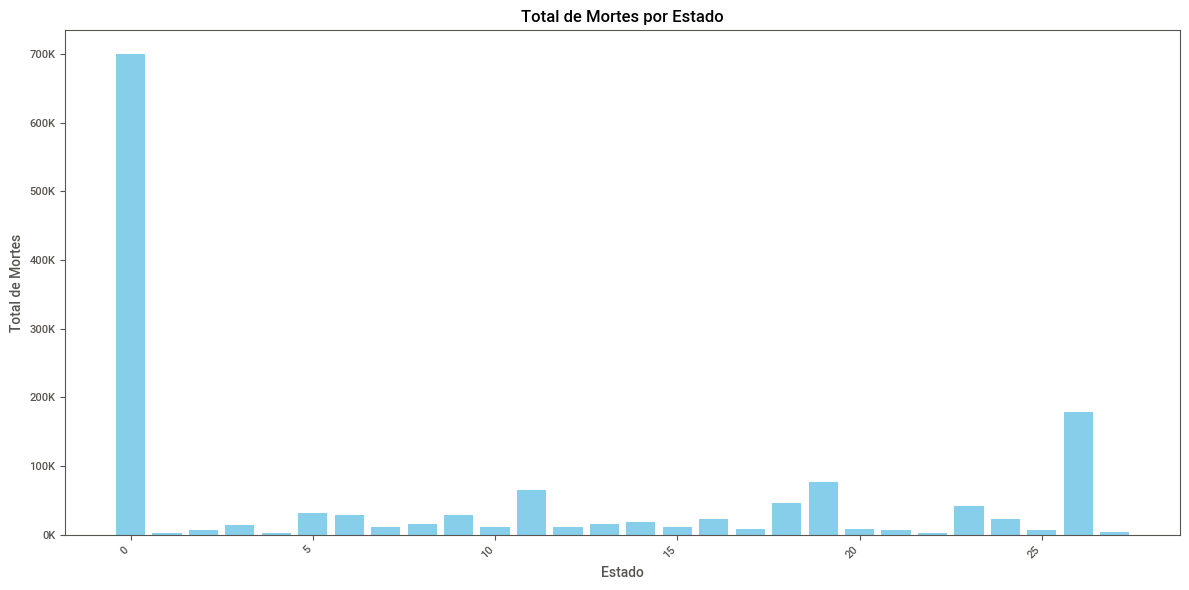

In [ ]:
# Ordenar os dados pelo número de mortes para uma melhor visualização
df_total_sorted = df_total.sort_values(by='deaths', ascending=False)

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(12, 6))

# Plotar o total de mortes por estado
bars = ax.bar(df_total_sorted.index, df_total_sorted['deaths'], color='skyblue')

# Adicionar rótulos e título
ax.set_xlabel('Estado')
ax.set_ylabel('Total de Mortes')
ax.set_title('Total de Mortes por Estado')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Remover as linhas de grade
ax.grid(False)

# Função para formatar os rótulos dos eixos em milhar
def format_thousands(x, pos):
    return '{:,.0f}K'.format(x / 1000)

# Aplicar a formatação aos eixos y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_thousands))


# Mostrar o gráfico
plt.tight_layout()
plt.show()


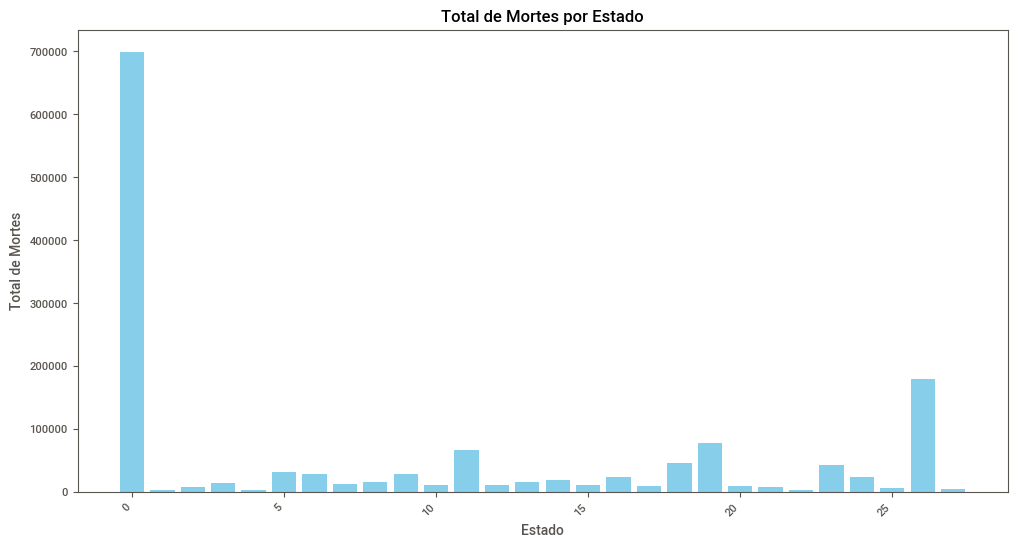

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filtrar o DataFrame para excluir a observação que representa o total de todos os estados
df_states_only = df_total[df_total.index != 'TOTAL']

# Ordenar os dados pelo número de mortes para uma melhor visualização
df_total_sorted = df_states_only.sort_values(by='deaths', ascending=False)

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(12, 6))

# Plotar o total de mortes por estado
bars = ax.bar(df_total_sorted.index, df_total_sorted['deaths'], color='skyblue')

# Adicionar rótulos e título
ax.set_xlabel('Estado')
ax.set_ylabel('Total de Mortes')
ax.set_title('Total de Mortes por Estado')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Remover as linhas de grade
ax.grid(False)

# Função p


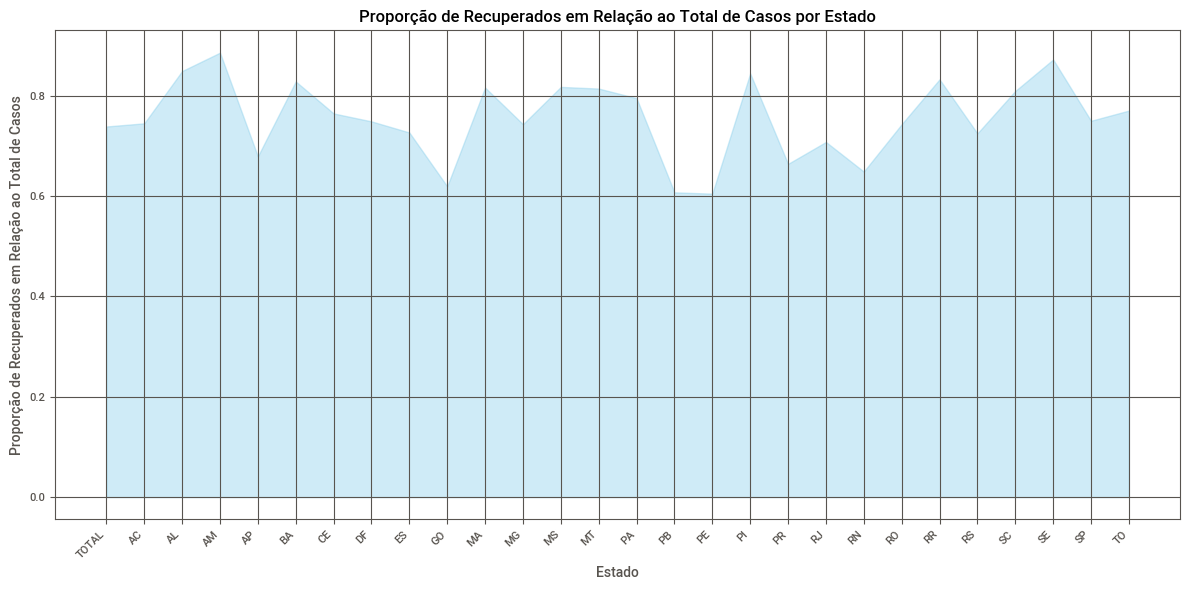

In [ ]:
import matplotlib.pyplot as plt

# Calcular a proporção de recuperados em relação ao total de casos por estado
df_total['recovery_rate'] = df_total['recovered'] / df_total['totalCases']

# Ordenar os dados pelo índice para garantir que a ordem seja consistente no gráfico
df_total.sort_index(inplace=True)

# Definir a coluna 'state' como o índice do DataFrame
df_total.set_index('state', inplace=True)

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(12, 6))

# Plotar a área para a proporção de recuperados em relação ao total de casos
ax.fill_between(df_total.index, df_total['recovery_rate'], color='skyblue', alpha=0.4)

# Adicionar rótulos e título
ax.set_xlabel('Estado')
ax.set_ylabel('Proporção de Recuperados em Relação ao Total de Casos')
ax.set_title('Proporção de Recuperados em Relação ao Total de Casos por Estado')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adicionar grid
ax.grid(True)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


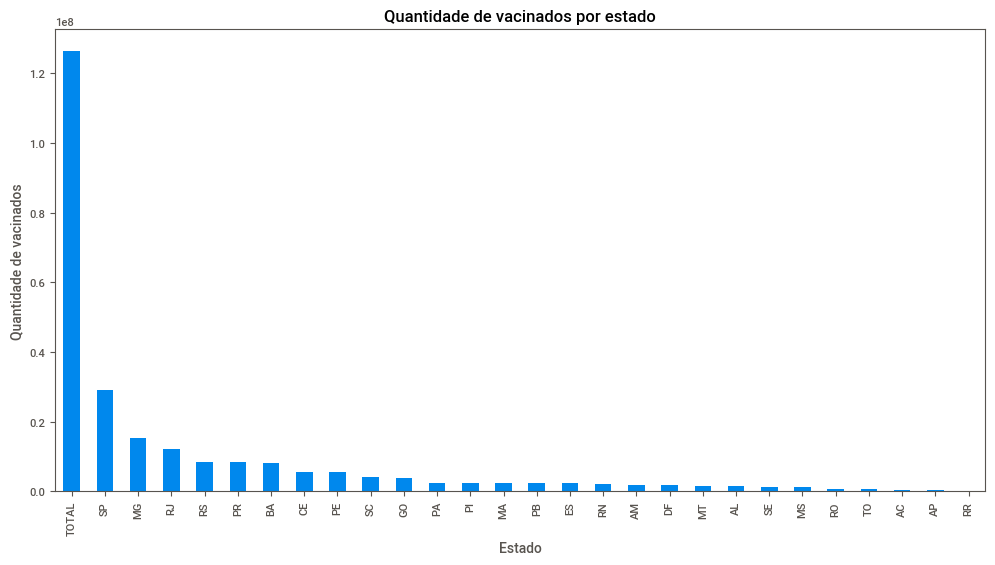

In [ ]:
# Agrupar os dados por estado e somar a quantidade de vacinados
vaccinated_by_state = df_total.groupby('state')['vaccinated_third'].sum().sort_values(ascending=False)

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
vaccinated_by_state.plot(kind='bar')
plt.title('Quantidade de vacinados por estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de vacinados')
plt.show()

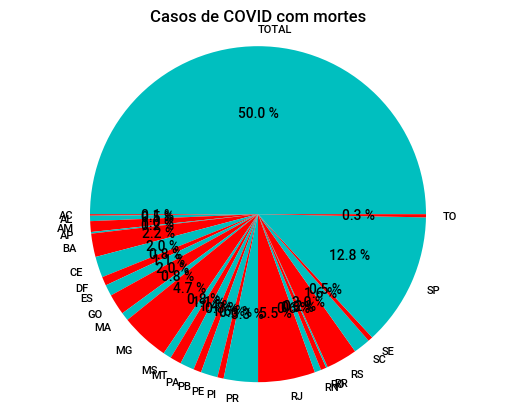

In [ ]:
# Definir os rótulos para cada parte
labels = ['totalCases', 'deaths']

# Definir as cores para cada parte
colors = ['c', 'r']

# Create a pie chart based on the 'deaths' column
plt.pie(df_total['deaths'], labels=df_total.index, autopct="%0.1f %%", colors=colors)

# Equal aspect ratio ensures a circular pie chart
plt.axis('equal')

# Adicionar tíutlo
plt.title('Casos de COVID com mortes')

# Show the chart
plt.show()


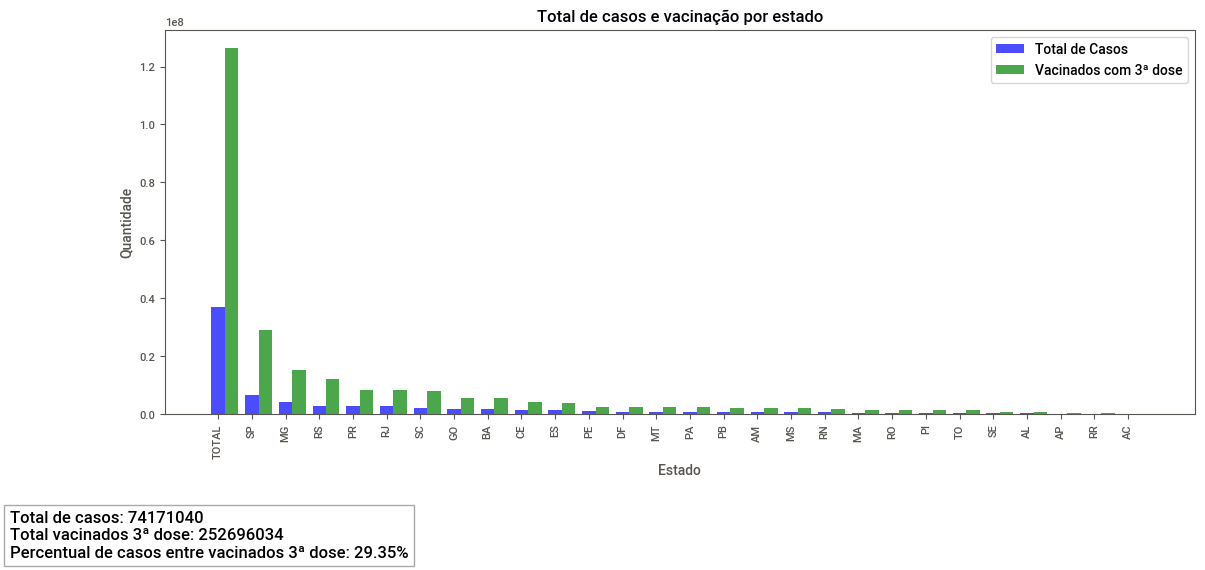

In [ ]:
total_cases = df_total['totalCasesMS'].sum()

total_vaccinated_third = df_total['vaccinated_third'].sum()

cases_among_vaccinated_third = df_total[df_total['vaccinated_third'] > 0]['totalCasesMS'].sum()

percent_cases_among_vaccinated_third = (cases_among_vaccinated_third / total_vaccinated_third) * 100

vaccinated_by_state = df_total.groupby('state')['vaccinated_third'].sum().sort_values(ascending=False)

cases_by_state = df_total.groupby('state')['totalCasesMS'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(cases_by_state.index, cases_by_state.values, label='Total de Casos', color='blue', alpha=0.7, width=0.4)

ax.bar([x + 0.4 for x in range(len(vaccinated_by_state))], vaccinated_by_state.values, label='Vacinados com 3ª dose', color='green', alpha=0.7, width=0.4)

info_text = f'Total de casos: {total_cases}\nTotal vacinados 3ª dose: {total_vaccinated_third}\nPercentual de casos entre vacinados 3ª dose: {percent_cases_among_vaccinated_third:.2f}%'
plt.text(-0.15, -0.25, info_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.title('Total de casos e vacinação por estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.legend()
plt.tight_layout()  # Ajustar o layout para que não haja sobreposição

plt.show()


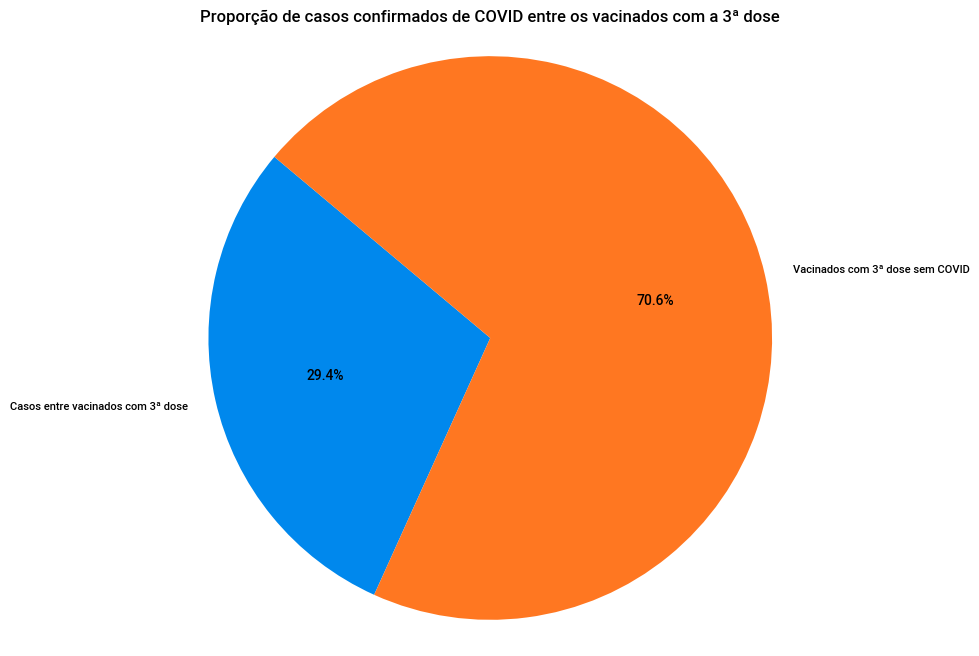

In [ ]:
total_cases = df_total['totalCasesMS'].sum()

total_vaccinated_third = df_total['vaccinated_third'].sum()

cases_among_vaccinated_third = df_total[df_total['vaccinated_third'] > 0]['totalCasesMS'].sum()

proportion_cases_among_vaccinated_third = cases_among_vaccinated_third / total_vaccinated_third

labels = ['Casos entre vacinados com 3ª dose', 'Vacinados com 3ª dose sem COVID']
sizes = [proportion_cases_among_vaccinated_third, 1 - proportion_cases_among_vaccinated_third]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proporção de casos confirmados de COVID entre os vacinados com a 3ª dose')
plt.show()


<ipython-input-57-e244c992dbcb>:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-57-e244c992dbcb>:29: UserWarning:

FixedFormatter should only be used together with FixedLocator



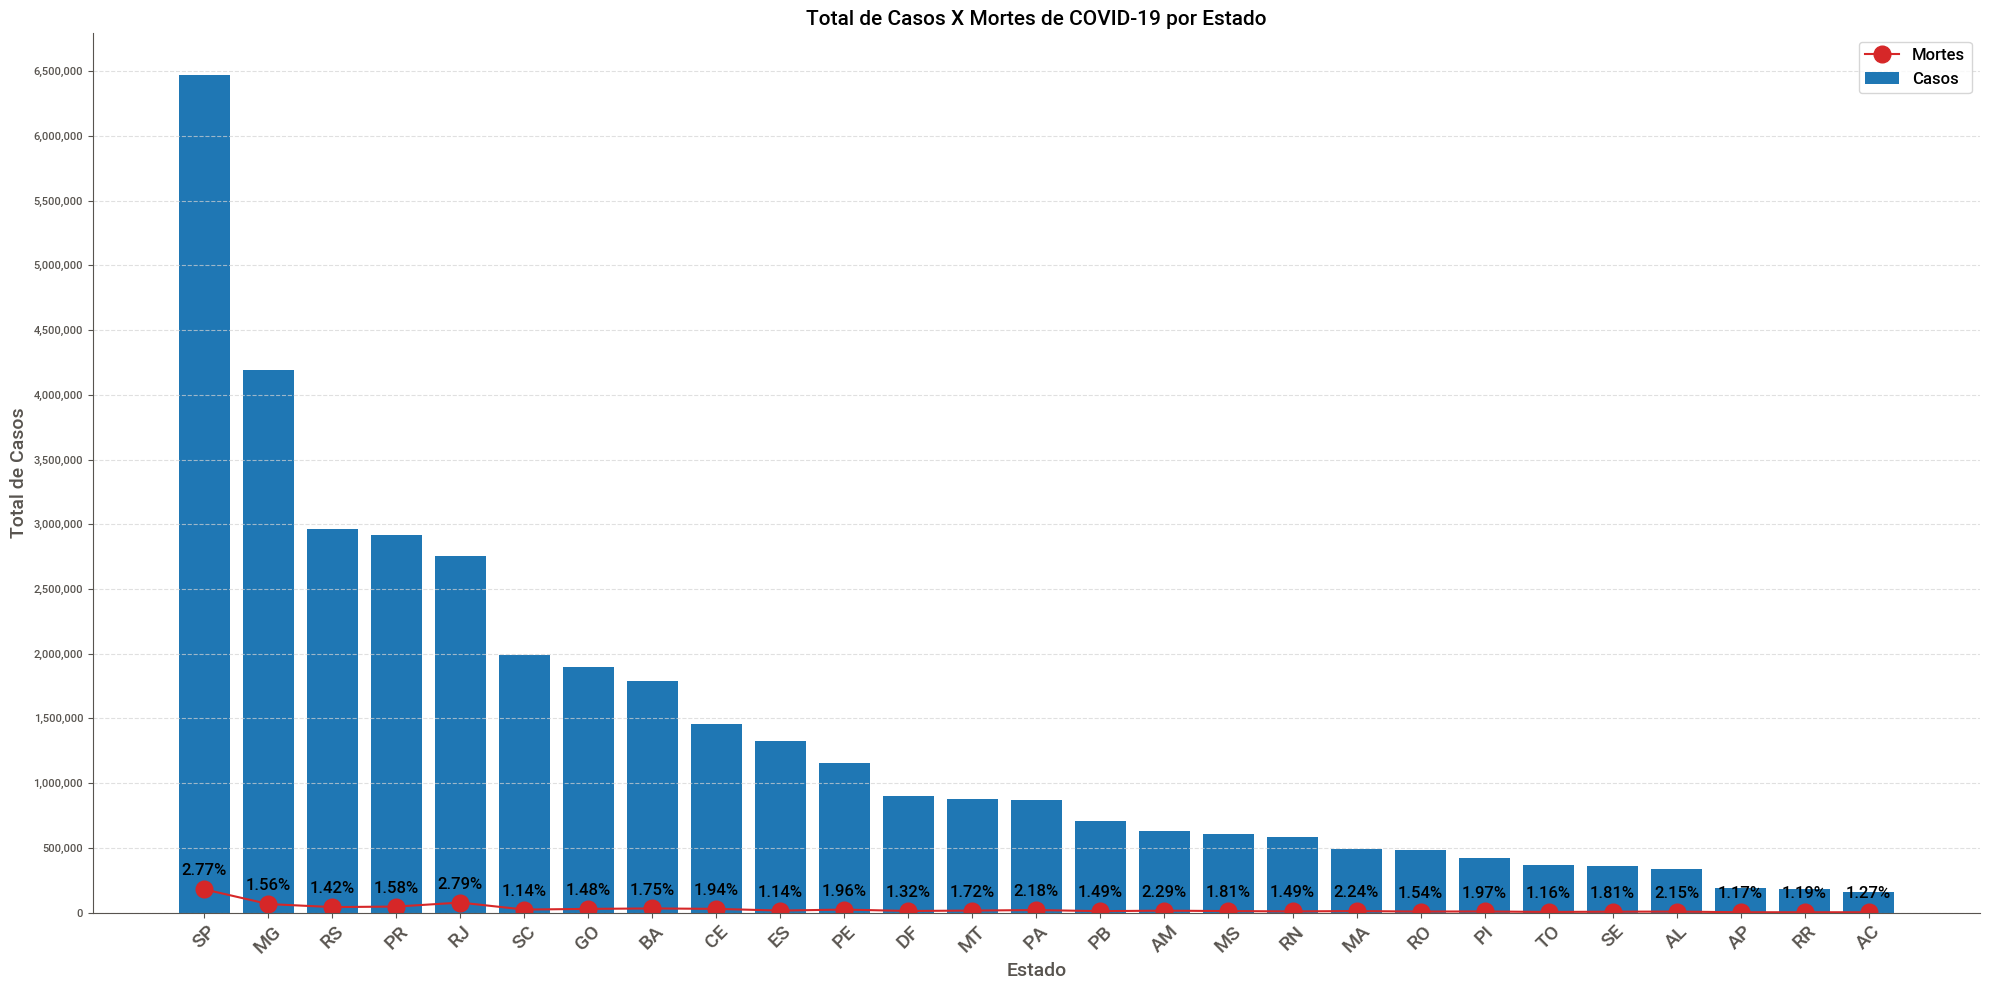

In [ ]:
# Carregar os dados
df_total = pd.read_csv('/content/cases-brazil-total.csv', skiprows=[1])

# Agrupa por estados
df_total_por_estado = df_total.groupby('state')['totalCases', 'deaths'].max().reset_index()

# Ordenar em ordem decrescente
df_total_por_estado = df_total_por_estado.sort_values(by='totalCases', ascending=False)

# Calculo do percentual de mortes x casos confirmados
df_total_por_estado['deathPercentage'] = (df_total_por_estado['deaths'] / df_total_por_estado['totalCases']) * 100
bar_width = 0.8 #Largura barra

# Gráfico de barras
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(df_total_por_estado['state'], df_total_por_estado['totalCases'], width=bar_width, label='Casos', color='#1f77b4')
ax.set_ylabel('Total de Casos', fontsize=14, fontweight='bold')

# Ajustar fonte do eixo y
ax.yaxis.label.set_weight('bold')

# Gráfico de linhas com pontos
ax.plot(df_total_por_estado['state'], df_total_por_estado['deaths'], color='#d62728', marker='o', markersize=12, label='Mortes')
for x, y, label in zip(df_total_por_estado['state'], df_total_por_estado['deaths'], df_total_por_estado['deathPercentage']):
    ax.annotate(f'{label:.2f}%', (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='black', fontsize=12, fontweight='bold')

ax.set_title('Total de Casos X Mortes de COVID-19 por Estado', fontsize=15, fontweight='bold')
ax.set_xlabel('Estado', fontsize=14)
ax.set_xticklabels(df_total_por_estado['state'], rotation=45, fontsize=14)
ax.legend(fontsize=12)

# Escla do eixo y
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x/1):,}')
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(ticker.MultipleLocator(500000))

# Remover bordas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Grade horizontal
ax.yaxis.grid(True, linestyle='--', color='lightgray', alpha=0.7)

plt.tight_layout()
plt.show()

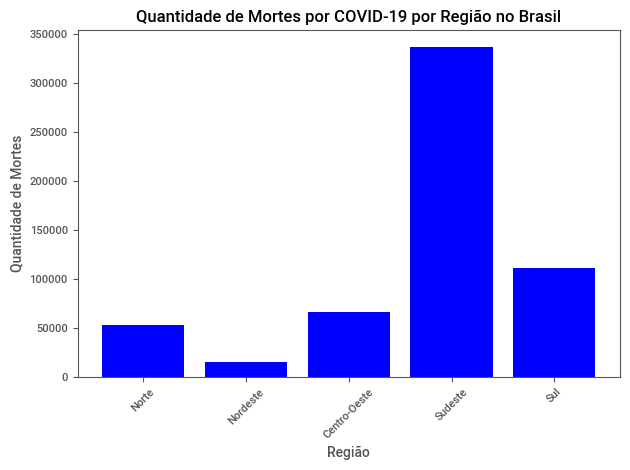

In [ ]:
# Calcular mortes por região
regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RN', 'RR', 'TO'],
    'Nordeste': ['Al', 'Ba', 'Ce', 'Ma', 'Pa', 'Pe', 'Pi', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

mortes_por_regiao = {}
for regiao, estados in regioes.items():
    mortes_por_regiao[regiao] = df_total[df_total['state'].isin(estados)]['deaths'].sum()

# Criar o gráfico
plt.bar(mortes_por_regiao.keys(), mortes_por_regiao.values(), color='blue')
plt.title('Quantidade de Mortes por COVID-19 por Região no Brasil')
plt.xlabel('Região')
plt.ylabel('Quantidade de Mortes')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()